# NFL's Most Difficult Road to Traveled. 

Over the past 20 years of recoreded NFL data, Some teams might of had a tougher road to victory then most. With the help of Machine Learning I want to find and rank the teams from most difficult road to easiest based on statistics from each game. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
df_nfl = pd.read_csv('nfl_team_stats_2002-2021.csv')
df_nfl.head(10)

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39
5,2002-09-08,Falcons,Packers,22,29,4-8,8-15,0-0,1-1,194,...,0-8,0-9,15,17,0,0,30:55,38:50,34,37
6,2002-09-08,Eagles,Titans,17,22,7-15,6-10,1-1,0-0,181,...,0-3,0-7,17,16,0,0,29:12,30:48,24,27
7,2002-09-08,Lions,Dolphins,15,27,7-14,6-12,0-1,1-1,206,...,0-6,0-8,18,16,0,2,25:36,34:24,21,49
8,2002-09-08,Cardinals,Washington,14,21,4-13,9-16,0-0,1-2,187,...,0-5,0-8,18,18,0,0,25:36,34:24,23,31
9,2002-09-08,Ravens,Panthers,15,15,5-14,5-14,0-0,0-0,212,...,0-3,0-2,13,12,0,0,26:09,33:51,7,10


In [2]:
df_nfl.shape

(5357, 39)

In [3]:
df_nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5357 non-null   object
 1   away                   5357 non-null   object
 2   home                   5357 non-null   object
 3   first_downs_away       5357 non-null   int64 
 4   first_downs_home       5357 non-null   int64 
 5   third_downs_away       5357 non-null   object
 6   third_downs_home       5357 non-null   object
 7   fourth_downs_away      5357 non-null   object
 8   fourth_downs_home      5357 non-null   object
 9   passing_yards_away     5357 non-null   int64 
 10  passing_yards_home     5357 non-null   int64 
 11  rushing_yards_away     5357 non-null   int64 
 12  rushing_yards_home     5357 non-null   int64 
 13  total_yards_away       5357 non-null   int64 
 14  total_yards_home       5357 non-null   int64 
 15  comp_att_away        

## Data Transformation

To better analyze the data, the home and away team stats should be separated into different rows. For this model we want to analyze just the individual team performance not the game. Monitoring just the team performance will help us predict if the stats were sufficent enough to win the game. Adding a win/loss column will be important because that is the metric we want to predict. If there are very few ties, those rows will be dropped. Date column will be for further analysis. 

- change date column to just the year
- create a win/loss columns
- seperate home and away into different rows
- create home and away columns

In [4]:
# change date column to just year
df_nfl.date = df_nfl.date.str.split('-', expand=True)[0]
df_nfl.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39


In [5]:
#add win/loss column and drop ties
def outcome_away(row):
    if row.score_away > row.score_home:
        row = 'win'
    else:
        row = 'loss'
    return row
df_nfl['outcome_away'] = df_nfl.apply(outcome_away, axis=1)

def outcome_home(row):
    if row.outcome_away == 'win':
        row = 'loss'
    else:
        row = 'win'
    return row
df_nfl['outcome_home'] = df_nfl.apply(outcome_home, axis=1)

# drop ties
ties = df_nfl[df_nfl.score_away == df_nfl.score_home].shape[0]
print('There were ' + str(ties) + ' ties recorded in the dataset and the rows were dropped')
df_nfl = df_nfl[df_nfl.score_away != df_nfl.score_home]

There were 12 ties recorded in the dataset and the rows were dropped


In [6]:
df_nfl.shape

(5345, 41)

In [7]:
df_nfl.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home,outcome_away,outcome_home
0,2002,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,13,15,0,0,27:32,32:28,16,13,win,loss
1,2002,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,17,18,2,0,21:06,39:08,37,31,win,loss
2,2002,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,17,17,0,0,31:31,28:29,23,27,loss,win
3,2002,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,11,15,0,0,37:48,22:12,34,6,win,loss
4,2002,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,20,17,0,0,30:16,29:44,40,39,win,loss


In [8]:
df_nfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5345 entries, 0 to 5356
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   5345 non-null   object
 1   away                   5345 non-null   object
 2   home                   5345 non-null   object
 3   first_downs_away       5345 non-null   int64 
 4   first_downs_home       5345 non-null   int64 
 5   third_downs_away       5345 non-null   object
 6   third_downs_home       5345 non-null   object
 7   fourth_downs_away      5345 non-null   object
 8   fourth_downs_home      5345 non-null   object
 9   passing_yards_away     5345 non-null   int64 
 10  passing_yards_home     5345 non-null   int64 
 11  rushing_yards_away     5345 non-null   int64 
 12  rushing_yards_home     5345 non-null   int64 
 13  total_yards_away       5345 non-null   int64 
 14  total_yards_home       5345 non-null   int64 
 15  comp_att_away        

In [9]:
def data_transformation(df):
    
    '''
    input df
    
    output transformed data
    
    '''
    
    #split data into two different dataframes. Home and Away
    
    #Away data
    away_data = df[['date', 'away', 'first_downs_away', 'third_downs_away','fourth_downs_away',
        'passing_yards_away', 'rushing_yards_away',  'total_yards_away','comp_att_away',  'sacks_away',
        'rushing_attempts_away','fumbles_away',  'int_away', 
       'turnovers_away',  'penalties_away', 'redzone_away',  'drives_away', 
       'def_st_td_away',  'possession_away','score_away',  'outcome_away']]
    
    #remove 'away' from column names
    for col in away_data.columns:
        if '_' in col:
            new_name = col.rsplit('_', 1)[0]
            away_data.rename(columns={col:new_name}, inplace=True)
    
    #rename column away to team and set values for home_away column to away.
    away_data.rename(columns={'away':'team'}, inplace=True)
    away_data['home_away'] = 'away'
    
    #Home data
    home_data = df[['date', 'home',  'first_downs_home','third_downs_home', 'fourth_downs_home',  
        'passing_yards_home','rushing_yards_home', 'total_yards_home',  'comp_att_home', 
        'sacks_home',  'rushing_attempts_home','fumbles_home', 'int_home',
        'turnovers_home',  'penalties_home','redzone_home',  'drives_home',
        'def_st_td_home', 'possession_home',  'score_home', 'outcome_home']]
    
    #remove 'home' from column names
    for col in home_data.columns:
        if '_' in col:
            new_name = col.rsplit('_', 1)[0]
            home_data.rename(columns={col:new_name}, inplace=True)
                    
    #rename column home to team and set values for home_away column to home.           
    home_data.rename(columns={'home':'team'}, inplace=True)
    home_data['home_away'] = 'home'
    
    #concat home_data and away_data to from new transformed dataframe
    df = pd.concat([home_data, away_data]).reset_index()
    df = df.drop(columns='index')
    return df

In [10]:
df = data_transformation(df_nfl)
df

/Users/jordanbond/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-9-394fcce2703b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_data['home_away'] = 'away'
<ipython-input-9-394fcce2703b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,date,team,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,...,int,turnovers,penalties,redzone,drives,def_st_td,possession,score,outcome,home_away
0,2002,Giants,21,9-16,0-1,318,43,361,28-45,3-24,...,3,3,10-80,0-6,15,0,32:28,13,loss,home
1,2002,Bills,26,7-17,2-2,242,142,384,26-39,4-29,...,2,3,10-82,0-8,18,0,39:08,31,loss,home
2,2002,Bears,20,7-13,0-0,288,80,368,20-33,1-9,...,1,2,4-33,0-6,17,0,28:29,27,win,home
3,2002,Bengals,13,4-11,0-0,167,36,203,18-31,4-31,...,1,1,9-57,0-5,15,0,22:12,6,loss,home
4,2002,Browns,24,4-11,0-0,352,59,411,28-40,1-7,...,0,1,4-38,0-10,17,0,29:44,39,loss,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,2022,Rams,24,4-11,0-0,355,73,428,28-38,2-11,...,0,4,4-45,2-5,15,0,34:08,30,win,away
10686,2022,Bills,23,6-14,4-4,313,109,422,27-37,2-16,...,0,0,3-15,3-3,9,0,27:37,36,loss,away
10687,2022,Bengals,21,8-14,0-0,243,116,359,23-38,1-7,...,1,1,4-30,1-4,10,0,35:56,27,win,away
10688,2022,49ers,16,3-9,0-0,232,50,282,16-30,0-0,...,1,1,6-54,1-1,9,0,24:21,17,loss,away


## Team Record

Creating a team record dataset to compare results from model predictions

In [11]:
records = df[['team', 'outcome']]
records = records.groupby(['team','outcome']).size().unstack()
records['percentage'] = records.win/records.loss
records = records[['win', 'loss', 'percentage']]
records

outcome,win,loss,percentage
team,,,
49ers,156,180,0.866667
Bears,156,173,0.901734
Bengals,152,176,0.863636
Bills,153,175,0.874286
Broncos,182,153,1.189542
Browns,109,214,0.509346
Buccaneers,151,180,0.838889
Cardinals,151,178,0.848315
Chargers,177,156,1.134615


#### Data Quality Assessment

The data is now in the ideal format for evaluation. The data quality should be assessed for machine learning use. 

- column with conversion ratios will be converted to decimals.
- redzone conversions are missing the amount of successful conversion for some columns
- penalties column will be split to amount of penalties and penalty yards 
- sacks column will be split to amount of sacks and sack yards

In [12]:
#split penalties column into two columns
df['penalty_yards'] = df.penalties.str.split('-', expand=True)[1].astype(int)
df.penalties = df.penalties.str.split('-', expand=True)[0].astype(int)


In [13]:
#split sacks column into two columns
df['sack_yards'] = df.sacks.str.split('-', expand=True)[1].astype(int)
df.sacks = df.sacks.str.split('-', expand=True)[0].astype(int)

In [14]:
#convert conversions to conversion rates
df.third_downs = df.third_downs.map(lambda x: int(x.split('-')[0])/int(x.split('-')[1]) if int(x.split('-')[0]) > 0 else int(x.split('-')[0]) + 0)
df.fourth_downs = df.fourth_downs.map(lambda x: int(x.split('-')[0])/int(x.split('-')[1]) if int(x.split('-')[0]) > 0 else int(x.split('-')[0]) + 0)
df.comp_att = df.comp_att.map(lambda x: int(x.split('-')[0])/int(x.split('-')[1]) if int(x.split('-')[0]) > 0 else int(x.split('-')[0]) + 0)
df.redzone = df.redzone.map(lambda x: int(x.split('-')[0])/int(x.split('-')[1]) if int(x.split('-')[0]) > 0 else int(x.split('-')[0]) + 0)

## Data Exploration

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10690 entries, 0 to 10689
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              10690 non-null  object 
 1   team              10690 non-null  object 
 2   first_downs       10690 non-null  int64  
 3   third_downs       10690 non-null  float64
 4   fourth_downs      10690 non-null  float64
 5   passing_yards     10690 non-null  int64  
 6   rushing_yards     10690 non-null  int64  
 7   total_yards       10690 non-null  int64  
 8   comp_att          10690 non-null  float64
 9   sacks             10690 non-null  int64  
 10  rushing_attempts  10690 non-null  int64  
 11  fumbles           10690 non-null  int64  
 12  int               10690 non-null  int64  
 13  turnovers         10690 non-null  int64  
 14  penalties         10690 non-null  int64  
 15  redzone           10690 non-null  float64
 16  drives            10690 non-null  int64 

In [16]:
df.duplicated().sum()

0

### Categorical

### Date

2017    566
2006    562
2012    562
2005    538
2021    536
2003    534
2011    534
2010    532
2008    532
2019    532
2007    532
2014    532
2013    532
2016    530
2018    530
2002    510
2015    502
2009    502
2004    502
2020    500
2022     90
Name: date, dtype: int64


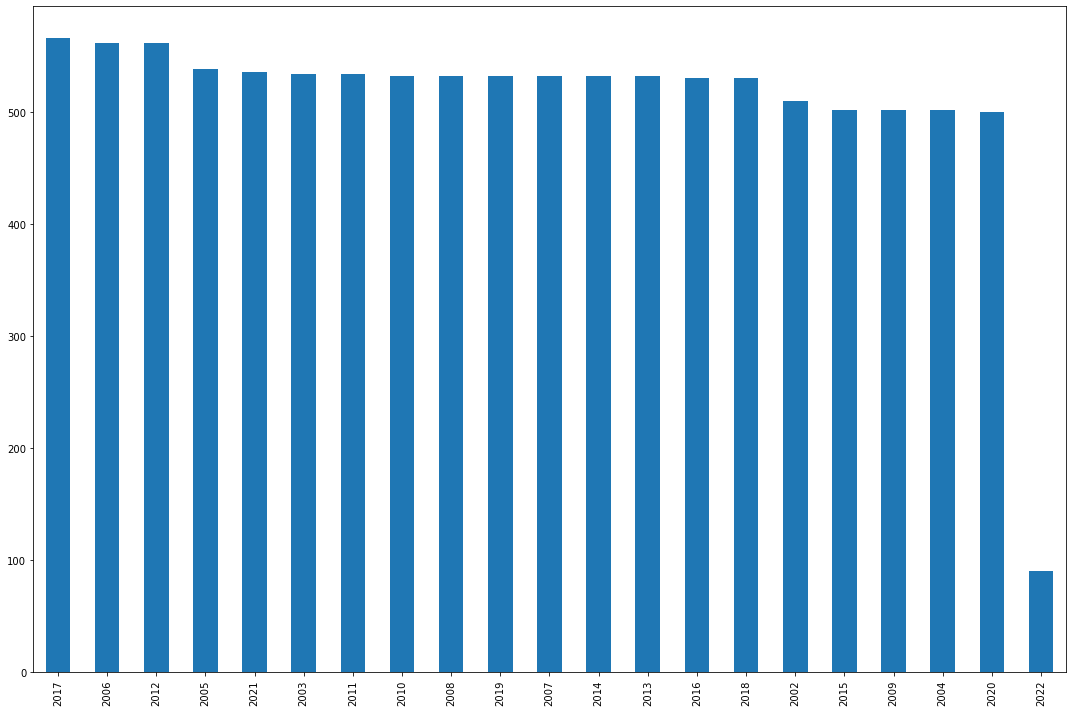

In [17]:
print(df.date.value_counts())
df.date.value_counts().plot(kind='bar');

In [18]:
df_17 = df_nfl[df_nfl.date == '2017']

In [19]:
df_17.query('away == "Titans" or home == "Titans" ')

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home,outcome_away,outcome_home
3976,2017,Texans,Titans,20,16,3-15,9-15,4-6,0-0,243,...,11,10,0,2,29:08,30:52,17,24,loss,win
4008,2017,Raiders,Titans,22,21,5-12,7-14,1-1,0-0,250,...,10,9,0,0,31:39,28:21,26,16,win,loss
4024,2017,Titans,Jaguars,21,20,6-13,6-13,0-0,0-0,211,...,12,11,0,0,30:46,29:14,37,16,win,loss
4044,2017,Seahawks,Titans,24,21,4-14,4-14,1-2,0-0,364,...,13,14,0,0,27:19,32:41,27,33,loss,win
4058,2017,Titans,Texans,9,33,2-8,6-12,0-0,1-1,109,...,14,12,0,2,20:19,39:41,14,57,loss,win
4070,2017,Titans,Dolphins,14,12,2-13,5-15,0-0,0-0,119,...,15,14,0,2,30:15,29:45,10,16,loss,win
4092,2017,Colts,Titans,18,25,2-9,6-13,0-1,1-1,212,...,10,11,2,0,24:07,35:53,22,36,loss,win
4096,2017,Titans,Browns,16,19,5-17,3-13,0-1,1-2,189,...,12,12,0,0,35:23,32:42,12,9,win,loss
4122,2017,Ravens,Titans,24,14,6-16,3-11,3-4,0-0,268,...,11,12,0,0,32:22,27:38,20,23,loss,win
4138,2017,Bengals,Titans,15,27,1-10,7-15,1-1,0-0,255,...,13,13,0,0,19:51,40:09,20,24,loss,win


In [20]:
df[df.date == '2017'].team.value_counts(), df[df.date == '2006'].team.value_counts(), df[df.date == '2012'].team.value_counts()

(Packers       20
 Patriots      20
 Steelers      20
 Falcons       20
 Texans        19
 Seahawks      19
 Raiders       18
 Chiefs        18
 Giants        18
 Lions         18
 Dolphins      18
 Cowboys       18
 Saints        17
 49ers         17
 Bengals       17
 Buccaneers    17
 Ravens        17
 Browns        17
 Bears         17
 Jaguars       17
 Washington    17
 Titans        17
 Cardinals     17
 Broncos       17
 Rams          17
 Eagles        17
 Chargers      17
 Bills         17
 Panthers      17
 Colts         17
 Vikings       17
 Jets          17
 Name: team, dtype: int64,
 Steelers      21
 Seahawks      20
 Panthers      20
 Patriots      19
 Washington    19
 Bengals       18
 Buccaneers    18
 Broncos       18
 Colts         18
 Bears         18
 Jaguars       18
 Falcons       17
 49ers         17
 Texans        17
 Packers       17
 Rams          17
 Browns        17
 Chiefs        17
 Jets          17
 Eagles        17
 Titans        17
 Ravens        17
 

In [21]:
df[df.date == '2018'].team.value_counts()

Patriots      19
Eagles        19
Jaguars       19
Saints        18
Falcons       18
Titans        18
Rams          17
Bills         17
Chiefs        17
Panthers      17
Vikings       17
49ers         16
Texans        16
Jets          16
Seahawks      16
Raiders       16
Bears         16
Chargers      16
Ravens        16
Cardinals     16
Giants        16
Steelers      16
Washington    16
Dolphins      16
Colts         16
Broncos       16
Cowboys       16
Buccaneers    16
Bengals       16
Lions         16
Packers       15
Browns        15
Name: team, dtype: int64

### Note
nfl teams up to 2021 season should only have 16 games minimum played. Some games from previous season may cross into date column. If regular season ends in next year then that next year will have more games recorded. 

### Team

Patriots      360
Seahawks      347
Colts         347
Packers       346
Steelers      342
Ravens        342
Eagles        341
Chiefs        340
Saints        338
49ers         336
Broncos       335
Titans        334
Giants        334
Panthers      334
Rams          333
Chargers      333
Falcons       333
Jets          332
Cowboys       331
Texans        331
Buccaneers    331
Vikings       330
Bears         329
Cardinals     329
Bills         328
Bengals       328
Jaguars       327
Raiders       326
Washington    325
Dolphins      323
Browns        323
Lions         322
Name: team, dtype: int64


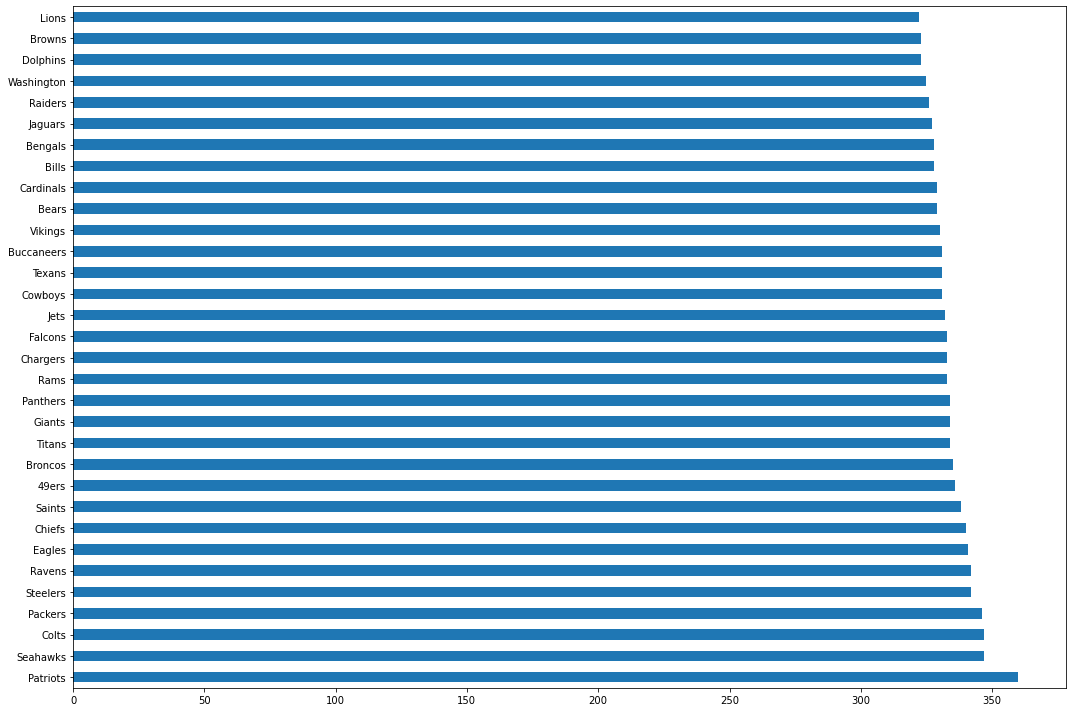

In [22]:
print(df.team.value_counts())
df.team.value_counts().plot(kind='barh');

### Note
Teams will have higher amount of games played if the team made the playoffs more often. 

### Outcome

loss    5345
win     5345
Name: outcome, dtype: int64


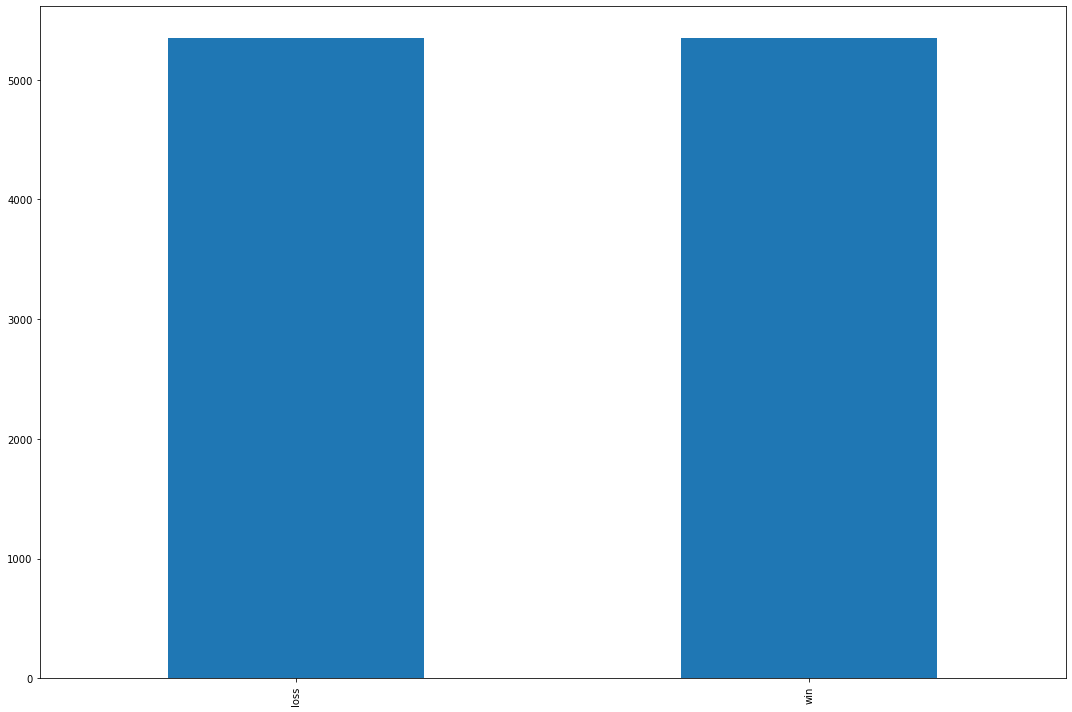

In [23]:
print(df.outcome.value_counts())
df.outcome.value_counts().plot(kind='bar');

In [24]:
df = pd.get_dummies(df, columns=['outcome'])
df.head()

,date,team,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,...,redzone,drives,def_st_td,possession,score,home_away,penalty_yards,sack_yards,outcome_loss,outcome_win
0,2002,Giants,21,0.562500,0.0,318,43,361,0.622222,3,...,0.0,15,0,32:28,13,home,80,24,1,0
1,2002,Bills,26,0.411765,1.0,242,142,384,0.666667,4,...,0.0,18,0,39:08,31,home,82,29,1,0
2,2002,Bears,20,0.538462,0.0,288,80,368,0.606061,1,...,0.0,17,0,28:29,27,home,33,9,0,1
3,2002,Bengals,13,0.363636,0.0,167,36,203,0.580645,4,...,0.0,15,0,22:12,6,home,57,31,1,0
4,2002,Browns,24,0.363636,0.0,352,59,411,0.700000,1,...,0.0,17,0,29:44,39,home,38,7,1,0


In [25]:
df = df.drop(columns='outcome_loss')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10690 entries, 0 to 10689
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              10690 non-null  object 
 1   team              10690 non-null  object 
 2   first_downs       10690 non-null  int64  
 3   third_downs       10690 non-null  float64
 4   fourth_downs      10690 non-null  float64
 5   passing_yards     10690 non-null  int64  
 6   rushing_yards     10690 non-null  int64  
 7   total_yards       10690 non-null  int64  
 8   comp_att          10690 non-null  float64
 9   sacks             10690 non-null  int64  
 10  rushing_attempts  10690 non-null  int64  
 11  fumbles           10690 non-null  int64  
 12  int               10690 non-null  int64  
 13  turnovers         10690 non-null  int64  
 14  penalties         10690 non-null  int64  
 15  redzone           10690 non-null  float64
 16  drives            10690 non-null  int64 

### Note
Outcome is our predictor metric. If there is a winner then there has to be a loser. I encoded the values for further evaluation

### Home Away

away    5345
home    5345
Name: home_away, dtype: int64


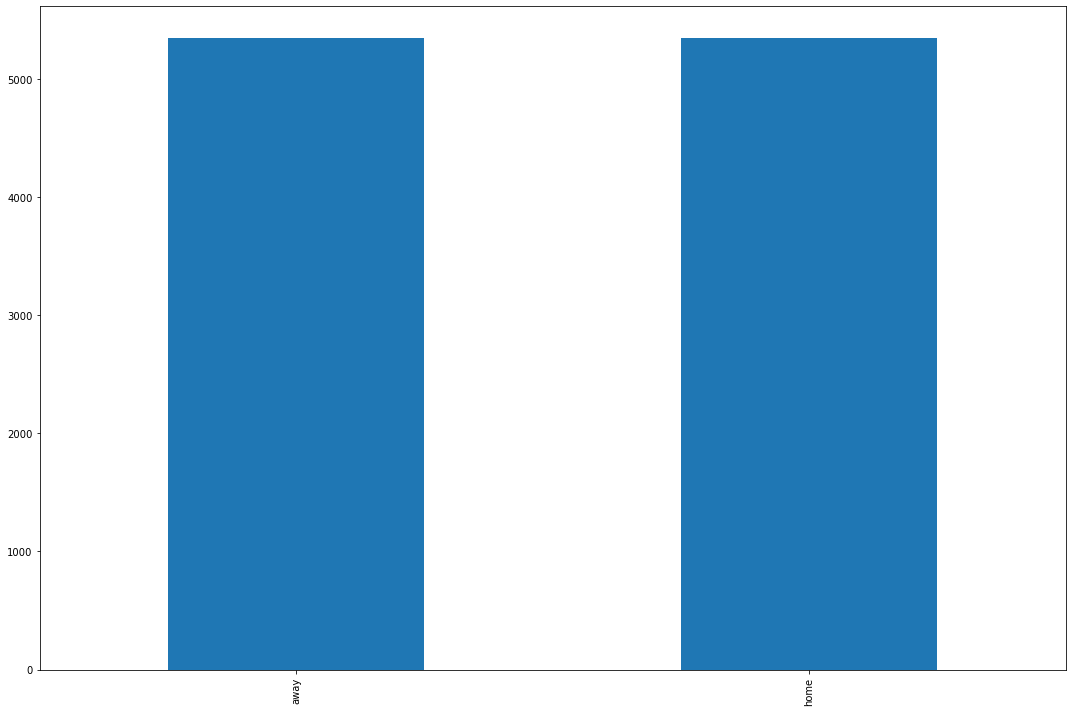

In [27]:
print(df.home_away.value_counts())
df.home_away.value_counts().plot(kind='bar');

### Note
Home and away is similar to outcome. There has to be a home and an away team.

### Possession

In [28]:
df.head()

,date,team,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,...,penalties,redzone,drives,def_st_td,possession,score,home_away,penalty_yards,sack_yards,outcome_win
0,2002,Giants,21,0.562500,0.0,318,43,361,0.622222,3,...,10,0.0,15,0,32:28,13,home,80,24,0
1,2002,Bills,26,0.411765,1.0,242,142,384,0.666667,4,...,10,0.0,18,0,39:08,31,home,82,29,0
2,2002,Bears,20,0.538462,0.0,288,80,368,0.606061,1,...,4,0.0,17,0,28:29,27,home,33,9,1
3,2002,Bengals,13,0.363636,0.0,167,36,203,0.580645,4,...,9,0.0,15,0,22:12,6,home,57,31,0
4,2002,Browns,24,0.363636,0.0,352,59,411,0.700000,1,...,4,0.0,17,0,29:44,39,home,38,7,0


In [29]:
#convert possession to minutes and round up by seconds. 
df.possession = df.possession.map(lambda x: int(x.split(':')[0]) + 1 if int(x.split(':')[1]) >= 30 else int(x.split(':')[0]) + 0)
df.head()

,date,team,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,...,penalties,redzone,drives,def_st_td,possession,score,home_away,penalty_yards,sack_yards,outcome_win
0,2002,Giants,21,0.562500,0.0,318,43,361,0.622222,3,...,10,0.0,15,0,32,13,home,80,24,0
1,2002,Bills,26,0.411765,1.0,242,142,384,0.666667,4,...,10,0.0,18,0,39,31,home,82,29,0
2,2002,Bears,20,0.538462,0.0,288,80,368,0.606061,1,...,4,0.0,17,0,28,27,home,33,9,1
3,2002,Bengals,13,0.363636,0.0,167,36,203,0.580645,4,...,9,0.0,15,0,22,6,home,57,31,0
4,2002,Browns,24,0.363636,0.0,352,59,411,0.700000,1,...,4,0.0,17,0,30,39,home,38,7,0


### Note

I decided to convert possession from time to int in minutes

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10690 entries, 0 to 10689
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              10690 non-null  object 
 1   team              10690 non-null  object 
 2   first_downs       10690 non-null  int64  
 3   third_downs       10690 non-null  float64
 4   fourth_downs      10690 non-null  float64
 5   passing_yards     10690 non-null  int64  
 6   rushing_yards     10690 non-null  int64  
 7   total_yards       10690 non-null  int64  
 8   comp_att          10690 non-null  float64
 9   sacks             10690 non-null  int64  
 10  rushing_attempts  10690 non-null  int64  
 11  fumbles           10690 non-null  int64  
 12  int               10690 non-null  int64  
 13  turnovers         10690 non-null  int64  
 14  penalties         10690 non-null  int64  
 15  redzone           10690 non-null  float64
 16  drives            10690 non-null  int64 

## Numerical

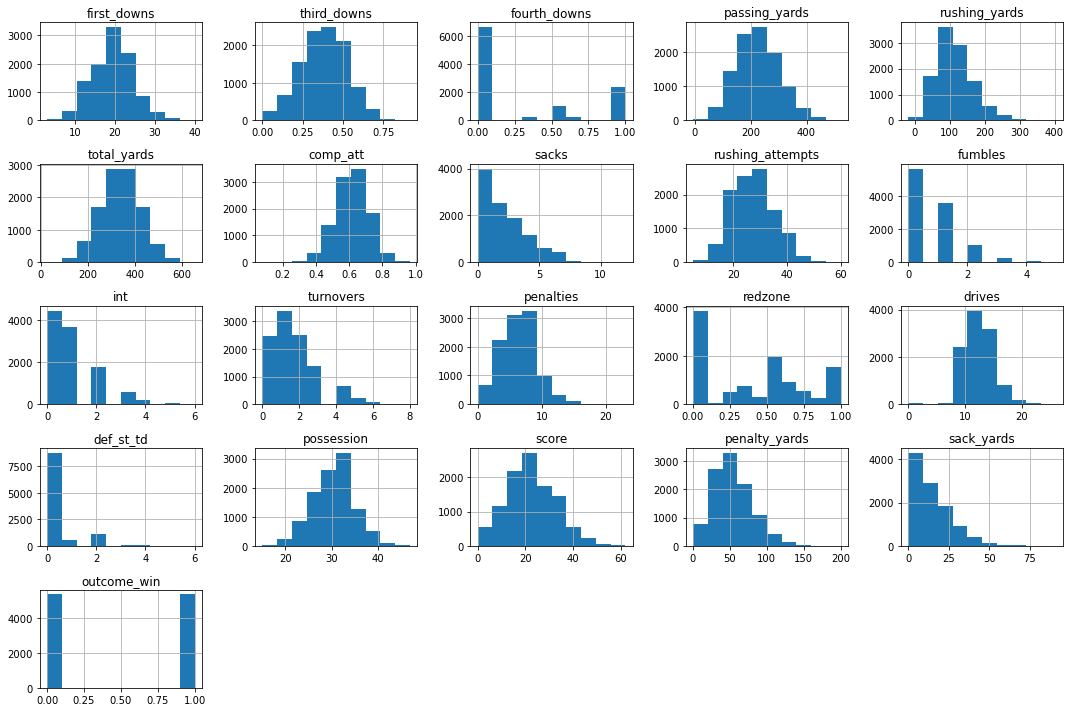

In [31]:
df.hist();

In [32]:
df.describe()

,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,rushing_attempts,fumbles,...,turnovers,penalties,redzone,drives,def_st_td,possession,score,penalty_yards,sack_yards,outcome_win
count,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,...,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000,10690.000000
mean,19.476427,0.384175,0.300017,224.569504,114.032460,338.601964,0.617026,2.279514,27.127128,0.636389,...,1.564546,6.317680,0.402456,12.237138,0.337138,30.213564,22.279420,52.911132,14.851918,0.500000
std,5.053892,0.141311,0.415721,78.558939,51.515102,85.404257,0.100200,1.710796,7.869719,0.804355,...,1.328599,2.764752,0.362033,2.553458,0.798127,4.587375,10.283366,26.580942,12.491339,0.500023
min,3.000000,0.000000,0.000000,-7.000000,-18.000000,26.000000,0.076923,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.285714,0.000000,169.000000,77.000000,280.000000,0.551724,1.000000,21.000000,0.000000,...,1.000000,4.000000,0.000000,11.000000,0.000000,27.000000,15.000000,35.000000,6.000000,0.000000
50%,19.000000,0.384615,0.000000,220.000000,107.000000,339.000000,0.619048,2.000000,27.000000,0.000000,...,1.000000,6.000000,0.400000,12.000000,0.000000,30.000000,22.000000,50.000000,13.000000,0.500000
75%,23.000000,0.500000,0.666667,276.000000,144.000000,396.000000,0.685714,3.000000,32.000000,1.000000,...,2.000000,8.000000,0.666667,13.000000,0.000000,33.000000,29.000000,69.000000,22.000000,1.000000
max,40.000000,0.916667,1.000000,522.000000,404.000000,653.000000,0.966667,12.000000,60.000000,5.000000,...,8.000000,23.000000,1.000000,26.000000,6.000000,47.000000,62.000000,200.000000,91.000000,1.000000


### Redzone

Redzone has an abnormal amount to zeros. According to the documentatiion from the data source. Redzone conversions are missing from games played up to 2006-2007 season 

0.000000    3864
0.500000    1590
1.000000    1550
0.666667     931
0.333333     754
0.750000     533
0.250000     376
0.600000     325
0.400000     270
0.800000     202
0.200000     100
0.833333      45
0.571429      37
0.166667      29
0.428571      26
0.714286      16
0.285714      13
0.857143      10
0.625000       5
0.142857       5
0.375000       3
0.875000       3
0.222222       1
0.300000       1
0.454545       1
Name: redzone, dtype: int64


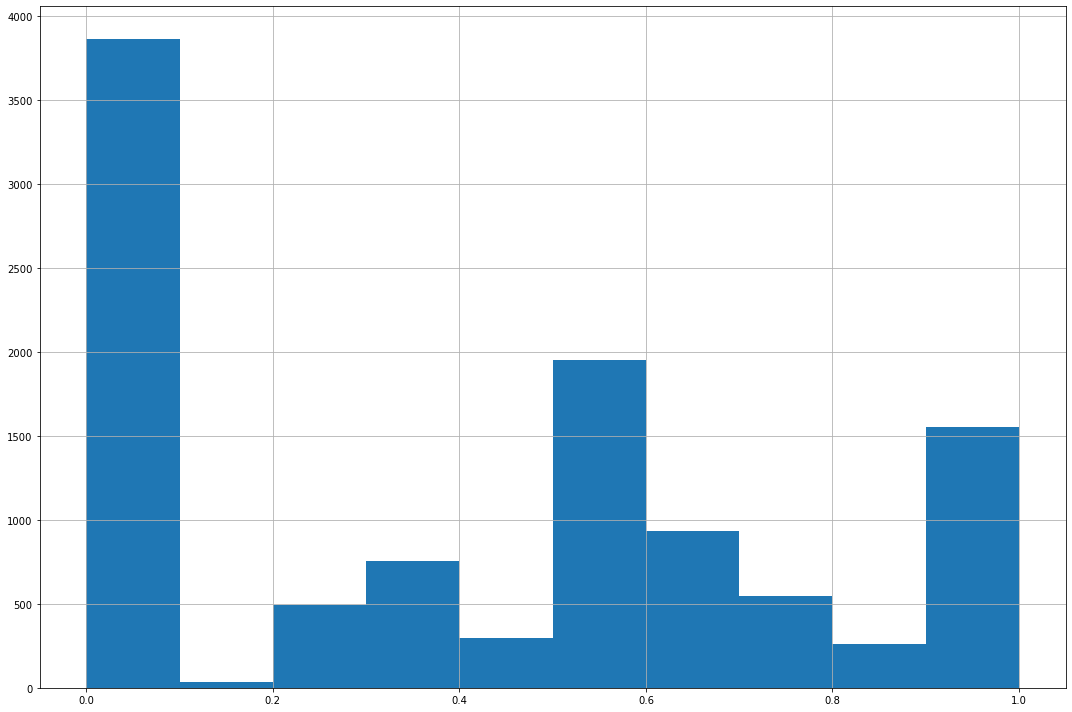

In [33]:
print(df.redzone.value_counts())
df.redzone.hist();

In [34]:
df.redzone.mean()

0.4024555085803915

In [35]:
df[df.redzone > 0].redzone.mean()

0.6302738626903581

In [36]:
df.redzone = df.redzone.map(lambda x: x + df[df.redzone > 0].redzone.mean() if x == 0 else x + 0)

In [37]:
df.redzone.mean()

0.6302738626903492

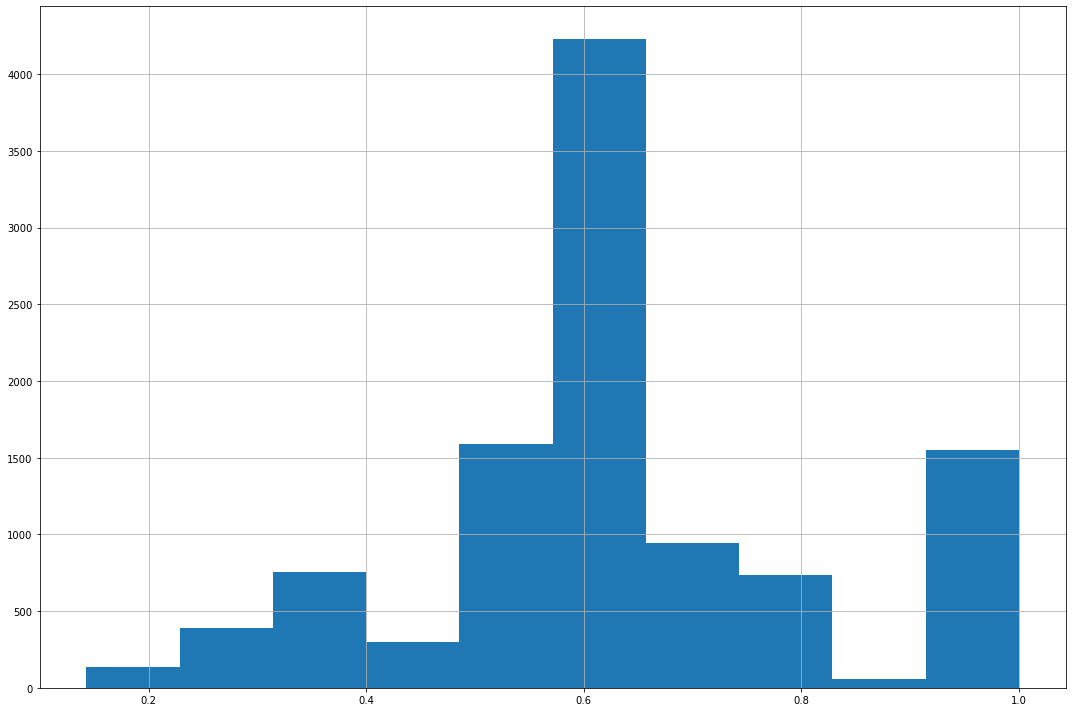

In [38]:
df.redzone.hist();

### Note

I chose to replace the 0 values with the average redzone conversion rate because the stat acutally occured in the games eventhough it wasn't recored and the stat recoreded as zero is a misrepresentation of the stat. 

### Passing Yards

Notice passing yards has a min of -7

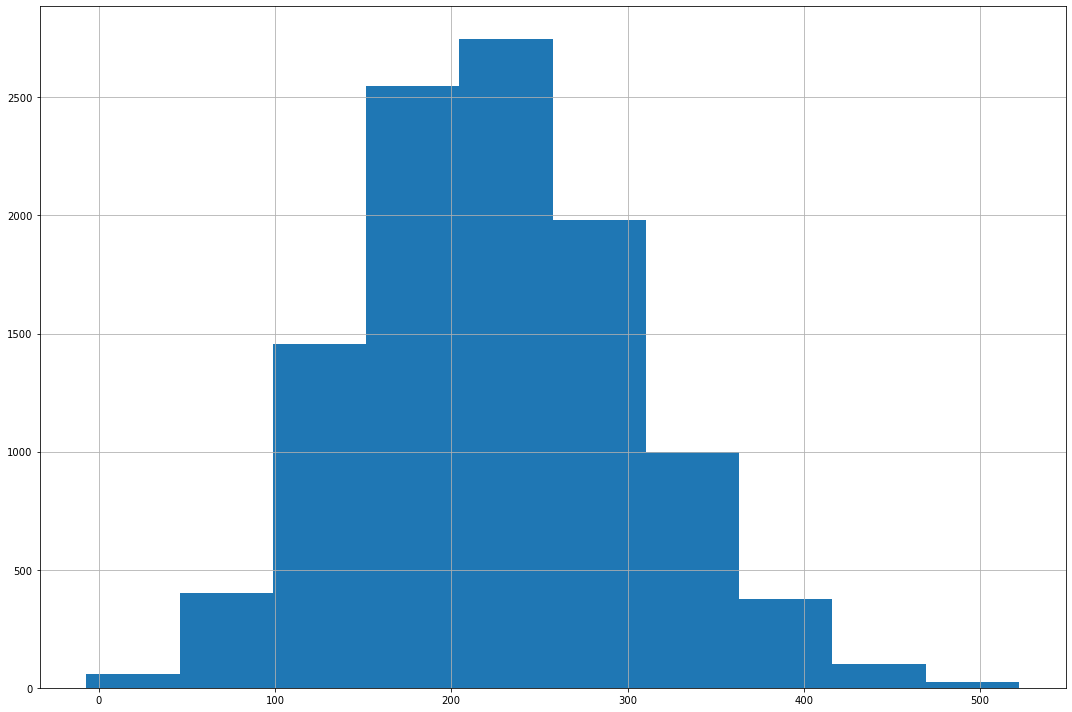

In [39]:
df.passing_yards.hist();

In [40]:
df[df.passing_yards < 100]

,date,team,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,...,penalties,redzone,drives,def_st_td,possession,score,home_away,penalty_yards,sack_yards,outcome_win
31,2002,Washington,11,0.250000,0.500000,90,89,179,0.516129,4,...,7,0.630274,18,1,25,7,home,55,29,0
38,2002,Texans,10,0.230769,0.000000,78,126,204,0.545455,4,...,9,0.630274,17,0,29,3,home,67,21,0
54,2002,Bengals,11,0.117647,0.666667,94,74,168,0.363636,3,...,4,0.630274,19,2,29,7,home,30,23,0
109,2002,Panthers,9,0.083333,0.000000,20,110,130,0.277778,3,...,7,0.630274,19,0,27,9,home,70,26,0
120,2002,Lions,8,0.133333,1.000000,96,52,148,0.424242,1,...,6,0.630274,15,0,25,9,home,50,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,2021,Vikings,13,0.294118,0.000000,61,132,193,0.500000,4,...,7,0.666667,12,0,31,17,away,54,26,1
10646,2022,Giants,13,0.090909,0.000000,-6,161,155,0.363636,4,...,3,0.630274,12,0,30,3,away,26,30,0
10657,2022,Panthers,16,0.428571,0.000000,90,88,178,0.653846,7,...,1,0.630274,10,0,31,10,away,5,42,0
10666,2022,Washington,16,0.230769,1.000000,99,226,325,0.500000,3,...,3,0.333333,10,1,32,22,away,29,21,1


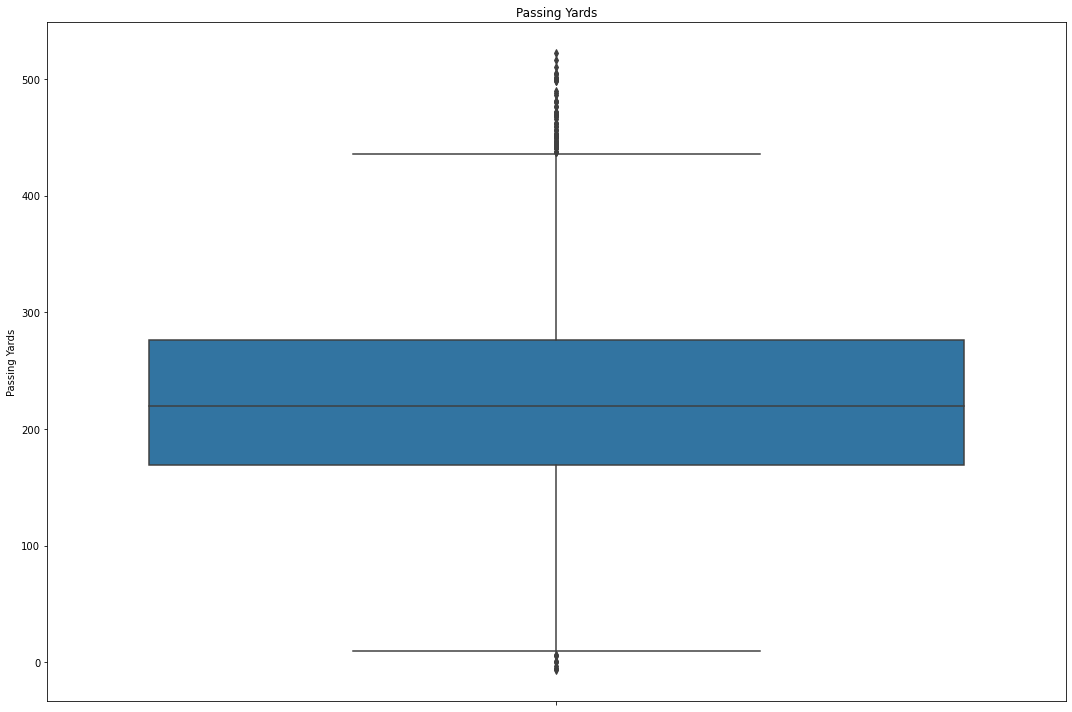

In [41]:
sns.boxplot(data=df, y='passing_yards')
plt.title('Passing Yards');

plt.ylabel('Passing Yards');

### Note
Negative passing yards is well below the average but not an outlier. Even +500 passing yards is well above average but not an outlier

### Rushing Yards
Noticed negative -18 rushing yard min

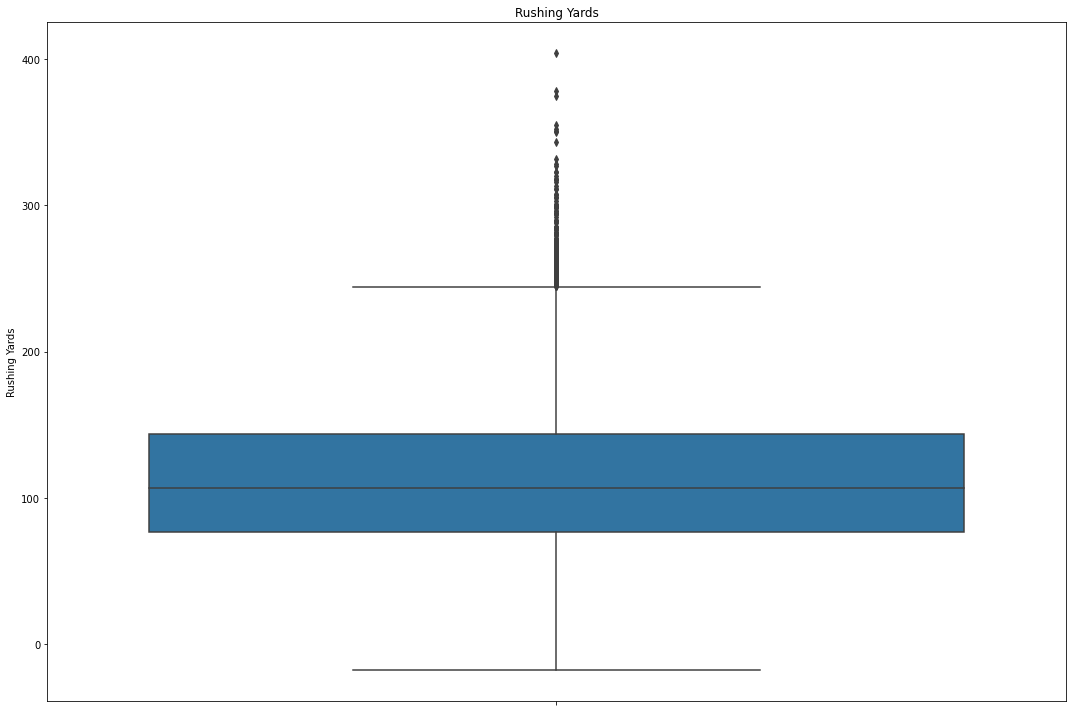

In [42]:
sns.boxplot(data=df, y='rushing_yards')
plt.title('Rushing Yards');

plt.ylabel('Rushing Yards');

### Note
Negative rushing are closer to the mean than the max rushing yards. 

### Correlation Heatmap

<AxesSubplot:>

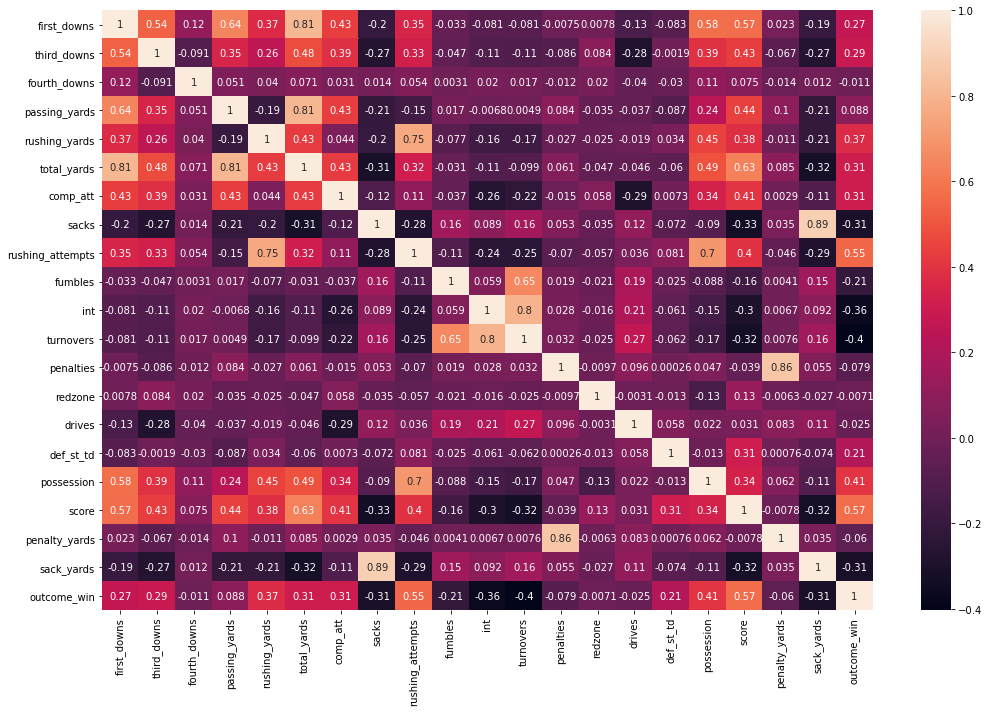

In [43]:
corr = df.corr()
sns.heatmap(corr, annot=True)

### Correlation Analysis

Correlation between winning and the other stats appear to be correct.

- Scores has the highest positive correlation to winning while turnovers has the lowest correlaton to winning
- rushing yards has a higher correlation to winning then both passing yards and total yards
- third down converstion have a slightly higher correlation to winning than first down conversions. 


### Note

Removing the score column from the analysis will allow the statistics of the game to determine a winners from losers much better. Scores decide the winners and losers at the end of the game. The models predicting could be thrown off by lower scoring high statisical performance games. We will continue with no score in the analysis

In [44]:
df = df.drop(columns='score')

<AxesSubplot:>

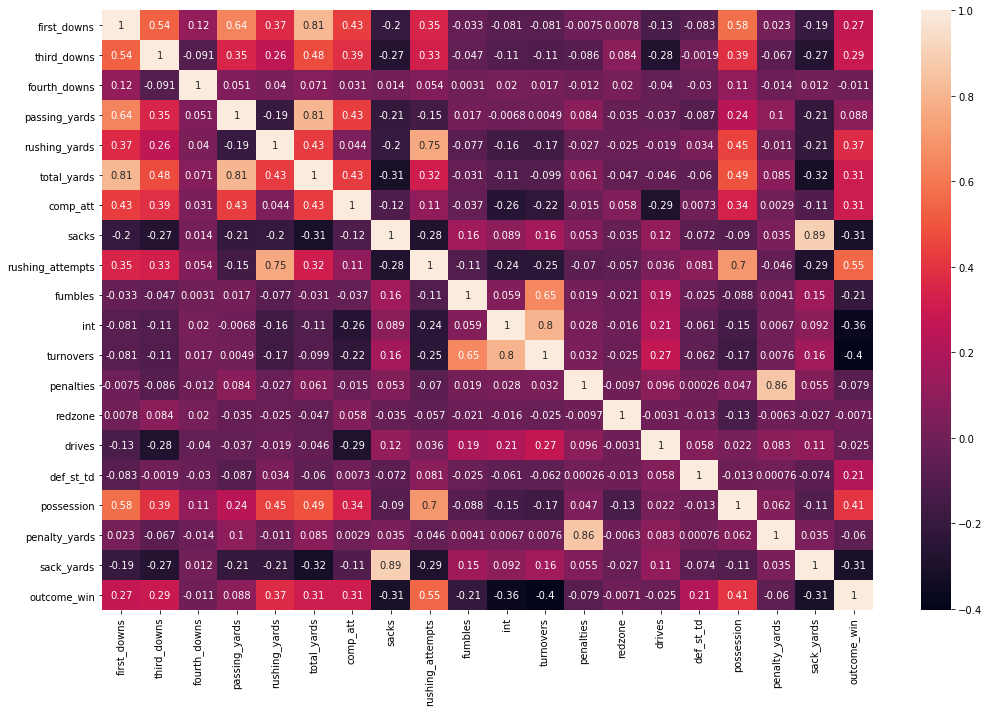

In [45]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [46]:
df.shape

(10690, 23)

## Outcome Analysis
Evaluation of the metric used to predict

In [47]:
df.groupby('outcome_win').mean()

,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,rushing_attempts,fumbles,int,turnovers,penalties,redzone,drives,def_st_td,possession,penalty_yards,sack_yards
outcome_win,,,,,,,,,,,,,,,,,,,
0,18.133022,0.343007,0.304755,217.640786,94.789336,312.430122,0.586402,2.806735,22.783162,0.805987,1.293545,2.099532,6.537325,0.631676,12.301590,0.168569,28.348550,54.515435,18.692610
1,20.819832,0.425342,0.295279,231.498223,133.275585,364.773807,0.647651,1.752292,31.471094,0.466791,0.562769,1.029560,6.098036,0.628872,12.172685,0.505706,32.078578,51.306829,11.011225


In [48]:
outcome_metrics = df.groupby('outcome_win').mean().columns

In [49]:
def displots(metric):
    
    
    sns.displot(data=df,  x=metric, col='outcome_win', kde=True);

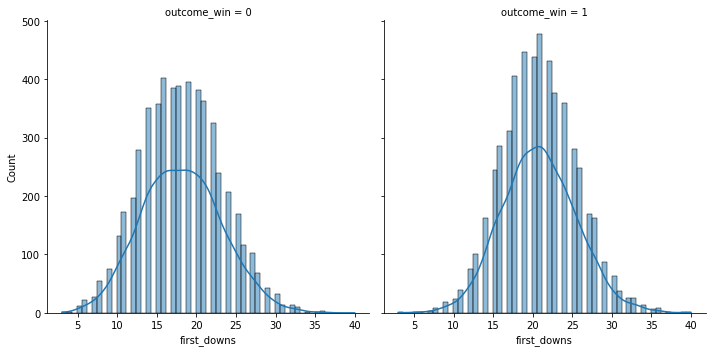

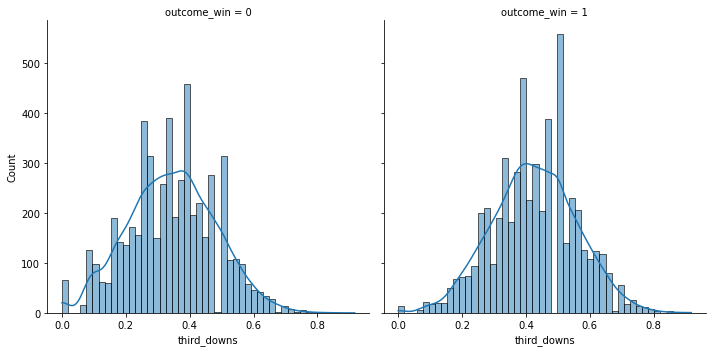

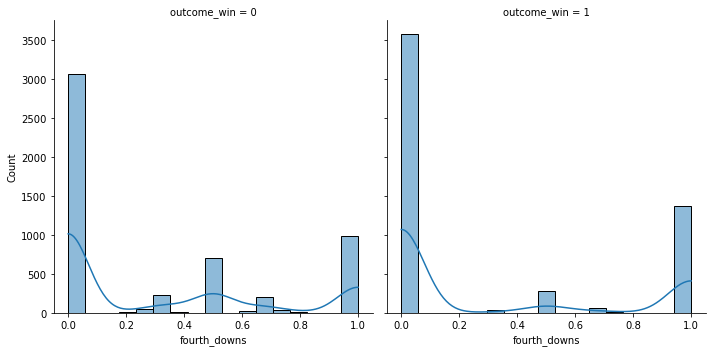

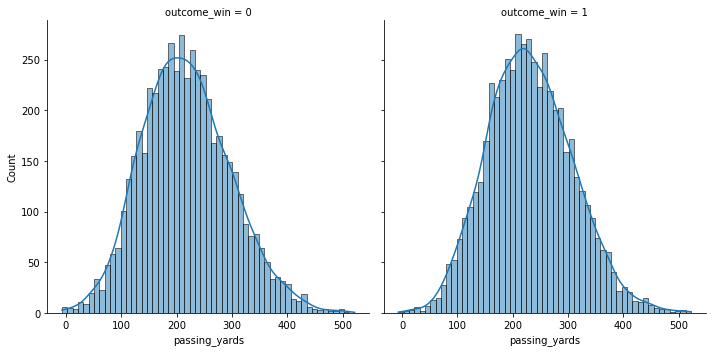

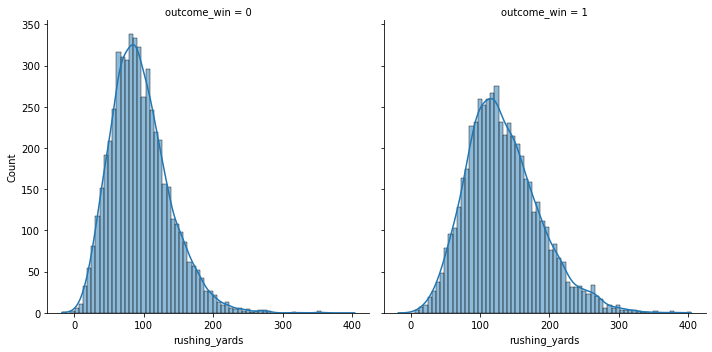

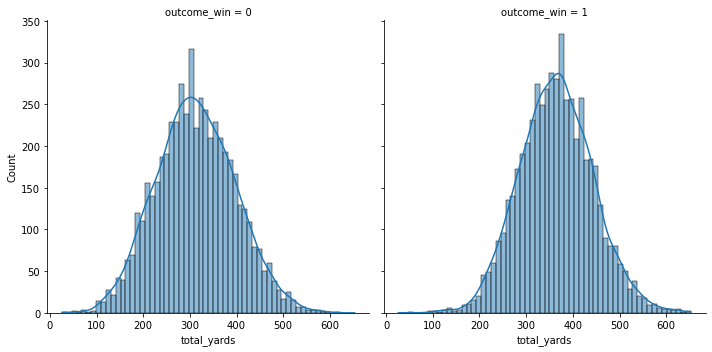

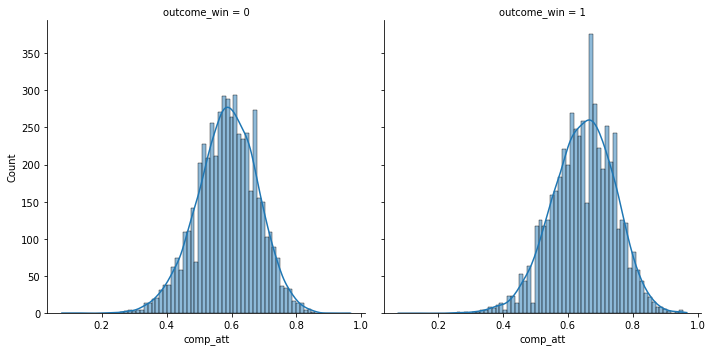

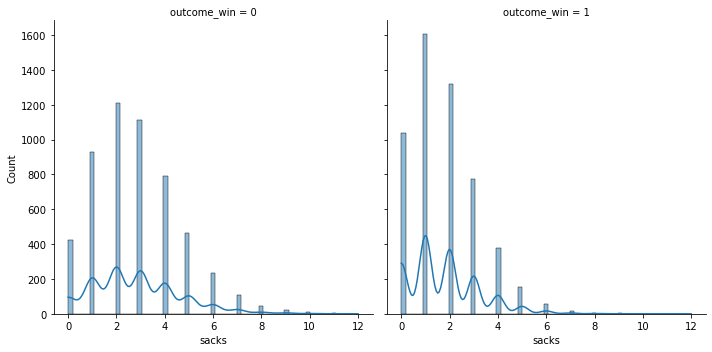

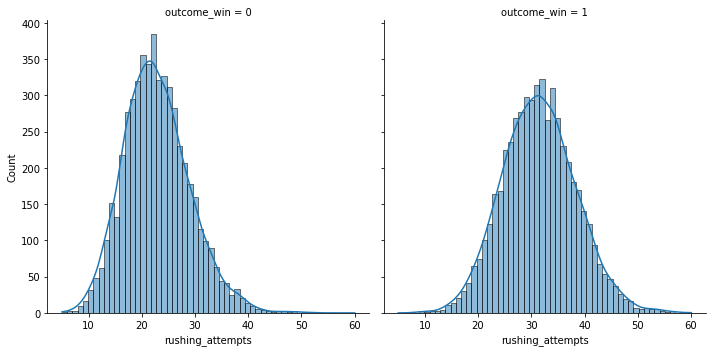

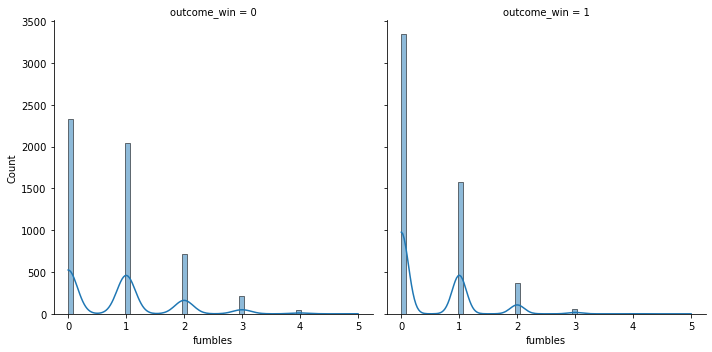

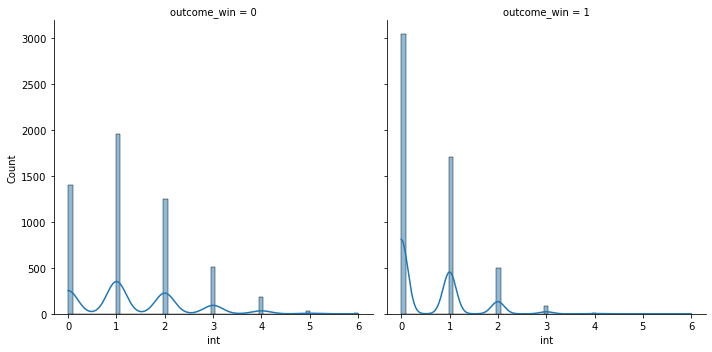

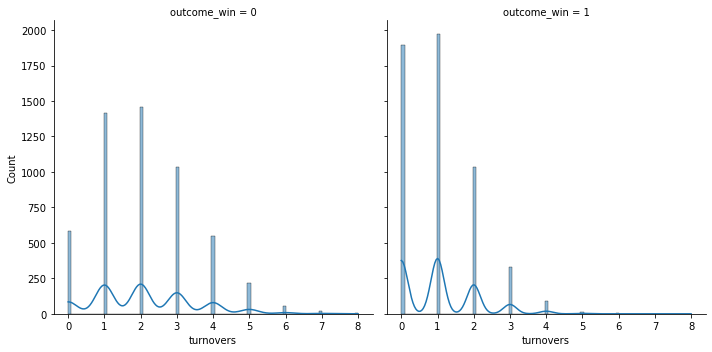

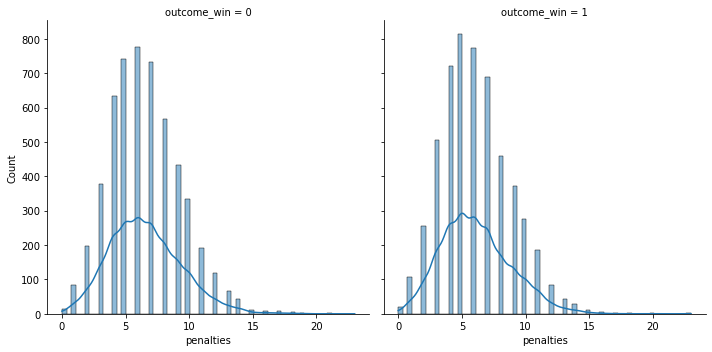

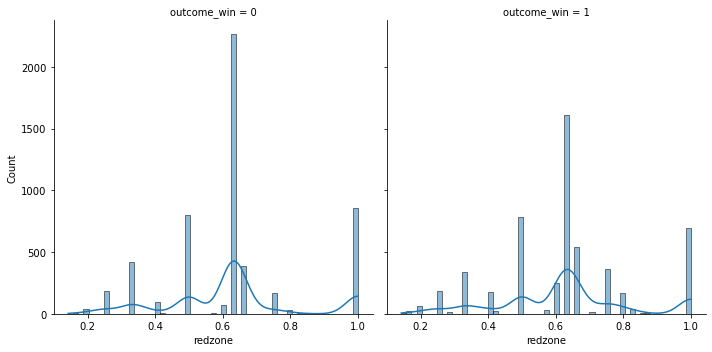

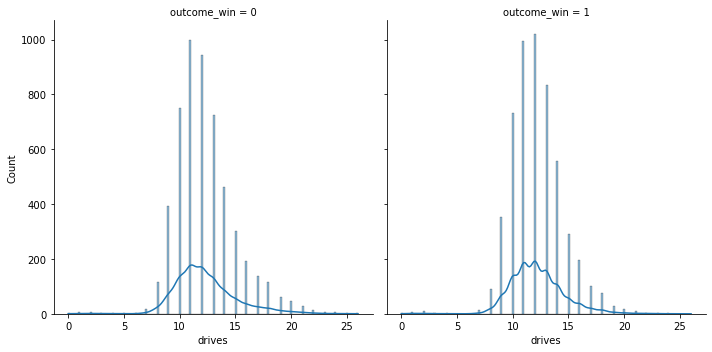

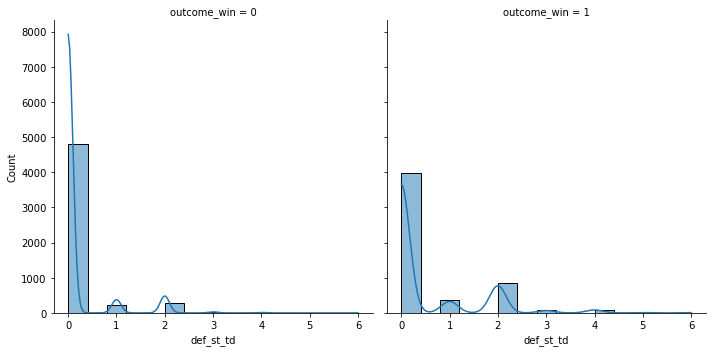

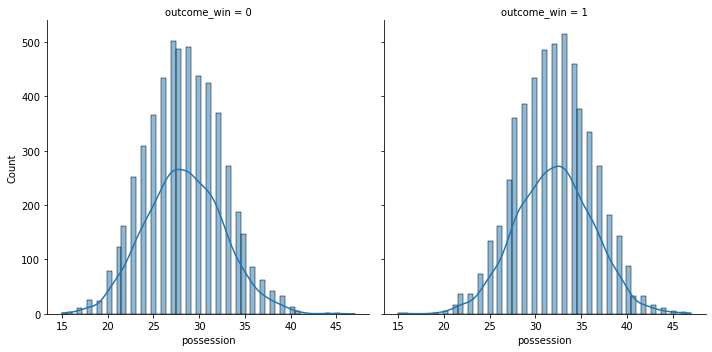

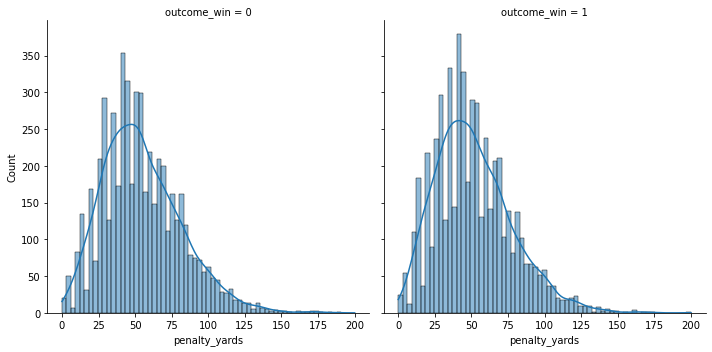

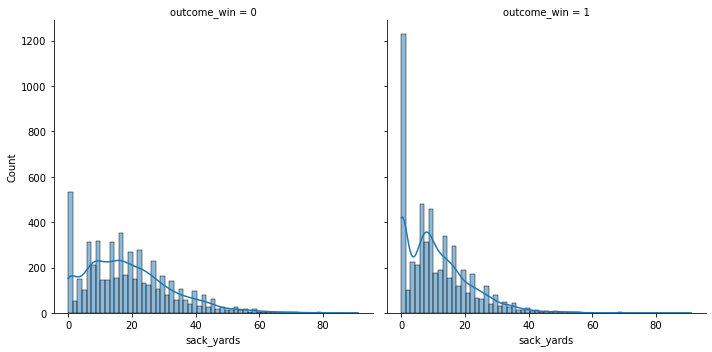

In [50]:
for metric in outcome_metrics:
    displots(metric)

# Model

Test the following models and some of its parameters for optimal accuracy and optimal statistical performance for winning outcomes
- Support Vector Machines
- Decision Trees
- K Nearest Neighbors
- Random Forest

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
y = df.outcome_win.map({0: 'loss', 1: 'win'})
X = df[outcome_metrics]

------------------------
SVM
------------------------
kernel: linear
0.82 accuracy with a standard deviation of 0.01
kernel: rbf
0.76 accuracy with a standard deviation of 0.01
kernel: poly
0.77 accuracy with a standard deviation of 0.01


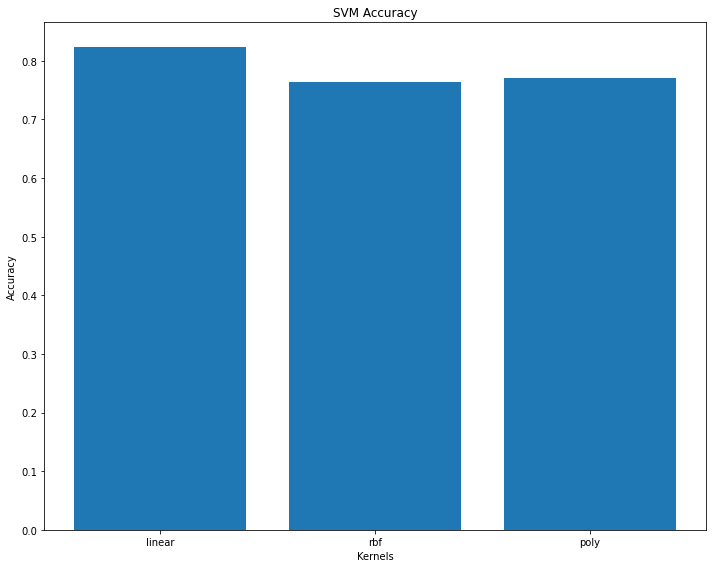

-------------------------
Optimal kernel: linear accuracy: 0.8244153414405986
-------------------------
------------------------
Decision Tree
------------------------
max depth: 1
0.75 accuracy with a standard deviation of 0.01
max depth: 2
0.77 accuracy with a standard deviation of 0.01
max depth: 3
0.77 accuracy with a standard deviation of 0.01
max depth: 4
0.79 accuracy with a standard deviation of 0.01
max depth: 6
0.80 accuracy with a standard deviation of 0.01


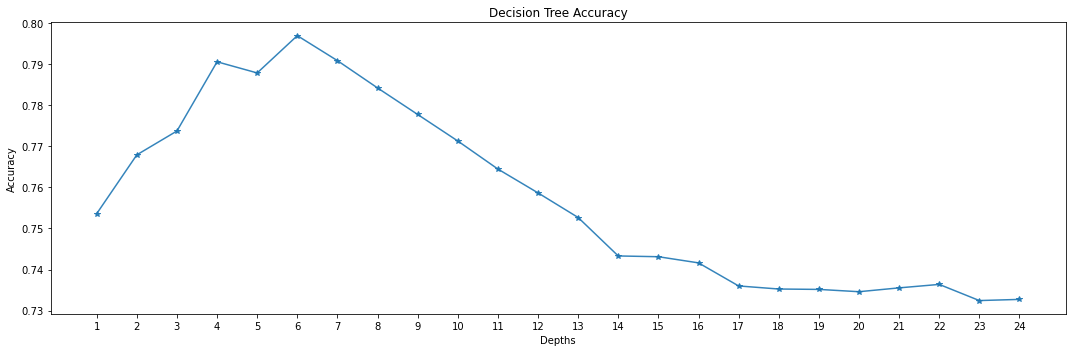

-------------------------
Optimal depth: 6 accuracy: 0.7969130028063611
-------------------------
------------------------
KNN
------------------------
max neighbor: 5
0.69 accuracy with a standard deviation of 0.01
max neighbor: 7
0.70 accuracy with a standard deviation of 0.01
max neighbor: 8
0.70 accuracy with a standard deviation of 0.01
max neighbor: 9
0.71 accuracy with a standard deviation of 0.01
max neighbor: 11
0.71 accuracy with a standard deviation of 0.01
max neighbor: 12
0.71 accuracy with a standard deviation of 0.01
max neighbor: 13
0.71 accuracy with a standard deviation of 0.01
max neighbor: 15
0.71 accuracy with a standard deviation of 0.01
max neighbor: 21
0.71 accuracy with a standard deviation of 0.01


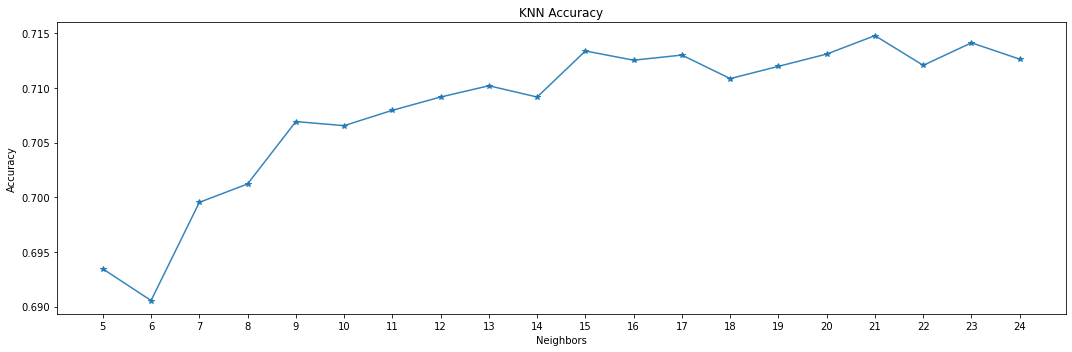

-------------------------
Optimal depth: 21 accuracy: 0.714780168381665
-------------------------
------------------------
Random Forest
------------------------
max depth: 1
0.77 accuracy with a standard deviation of 0.01
max depth: 2
0.78 accuracy with a standard deviation of 0.01
max depth: 3
0.79 accuracy with a standard deviation of 0.01
max depth: 4
0.80 accuracy with a standard deviation of 0.01
max depth: 5
0.80 accuracy with a standard deviation of 0.01
max depth: 6
0.81 accuracy with a standard deviation of 0.01
max depth: 7
0.81 accuracy with a standard deviation of 0.01
max depth: 8
0.82 accuracy with a standard deviation of 0.01
max depth: 9
0.82 accuracy with a standard deviation of 0.01
max depth: 10
0.82 accuracy with a standard deviation of 0.00
max depth: 11
0.82 accuracy with a standard deviation of 0.01


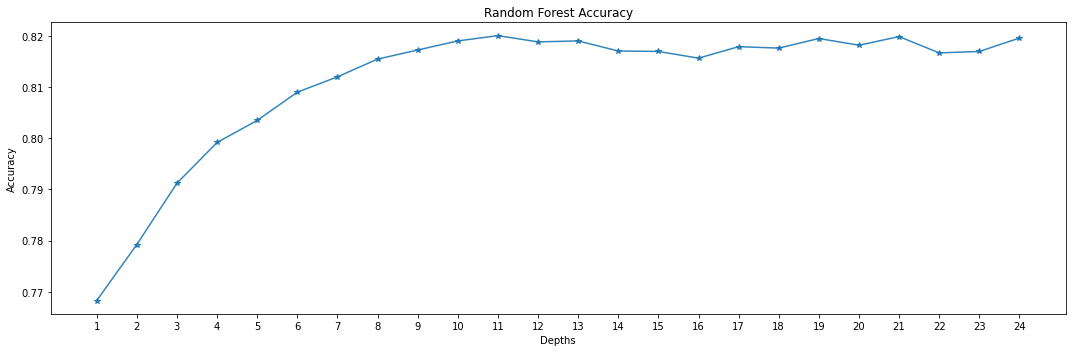

-------------------------
Optimal depth: 11 accuracy: 0.8200187090739007
-------------------------


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state = 21)

def find_optimal_svm(svm_kernels):
    
    optimal_score = 0
    accuracy_scores = []
    
    for kernels in svm_kernels:
        support = SVC(kernel=kernels)
        
        scores = cross_val_score(support, X, y, cv=5, scoring='accuracy', n_jobs=-1)
        print('kernel: ' + kernels)
        print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        accuracy_scores.append(scores.mean())
        
        if scores.mean() > optimal_score:
            optimal_score = scores.mean()
            optimal_kernel = kernels
    plt.rcParams["figure.figsize"] = [10, 8]
    plt.rcParams["figure.autolayout"] = True       
    plt.bar(svm_kernels, accuracy_scores)
    plt.title('SVM Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Kernels')
    plt.show()
    
    print('-------------------------')
    print('Optimal kernel: ' + optimal_kernel + ' accuracy: ' + str(optimal_score))
    print('-------------------------')
    return optimal_kernel   


def find_optimal_decision_tree(tree_depths):
    
    optimal_score = 0
    accuracy_scores = []
    
    for depth in tree_depths:
        tree = DecisionTreeClassifier(max_depth=depth)
        
        scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
        accuracy_scores.append(scores.mean())
        if scores.mean() > optimal_score:
            print('max depth: ' + str(depth))
            print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        
        
        if scores.mean() > optimal_score:
            optimal_score = scores.mean()
            optimal_depth = depth
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(tree_depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_xticks(tree_depths) 
    ax.set_title('Decision Tree Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Depths')
    plt.show()
    print('-------------------------')
    print('Optimal depth: ' + str(optimal_depth) + ' accuracy: ' + str(optimal_score))
    print('-------------------------')
    return optimal_depth

def find_optimal_knneighbors(neighbors):
    
    optimal_score = 0
    accuracy_scores = []
    
    for neighbor in neighbors:
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
        accuracy_scores.append(scores.mean())
        if scores.mean() > optimal_score:
            print('max neighbor: ' + str(neighbor))
            print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        
        
        if scores.mean() > optimal_score:
            optimal_score = scores.mean()
            optimal_neighbor = neighbor
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(neighbors, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_xticks(neighbors)
    ax.set_title('KNN Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Neighbors')
    plt.show()
    print('-------------------------')
    print('Optimal depth: ' + str(optimal_neighbor) + ' accuracy: ' + str(optimal_score))
    print('-------------------------')
    return optimal_neighbor

def find_optimal_random_forest(tree_depths):
    
    optimal_score = 0
    accuracy_scores = []
    
    for depth in tree_depths:
        tree = RandomForestClassifier(max_depth=depth)
        
        scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
        accuracy_scores.append(scores.mean())
        if scores.mean() > optimal_score:
            print('max depth: ' + str(depth))
            print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
        
        
        if scores.mean() > optimal_score:
            optimal_score = scores.mean()
            optimal_depth = depth
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(tree_depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_xticks(tree_depths)
    ax.set_title('Random Forest Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Depths')
    plt.show()
    print('-------------------------')
    print('Optimal depth: ' + str(optimal_depth) + ' accuracy: ' + str(optimal_score))
    print('-------------------------')
    return optimal_depth

svm_kernels = ['linear', 'rbf', 'poly']
tree_depths = range(1, 25)
neighbors = range(5, 25)
print('------------------------')
print('SVM')
print('------------------------')        
optimal_kernel = find_optimal_svm(svm_kernels)
print('------------------------')
print('Decision Tree')
print('------------------------')
optimal_tree = find_optimal_decision_tree(tree_depths)
print('------------------------')
print('KNN')
print('------------------------')
optimal_neighbor = find_optimal_knneighbors(neighbors)
print('------------------------')
print('Random Forest')
print('------------------------')
optimal_forest = find_optimal_random_forest(tree_depths)

### Optimal Model: SVM

In [54]:
def do_svm(optimal_kernel):
    
    support = SVC(kernel= optimal_kernel, random_state = 21)

    support = support.fit(X_train, y_train)

    y_pred = support.predict(X_test)
    print('------------------------')
    print('confusion matrix')
    print(confusion_matrix(y_test, y_pred))
    print('------------------------')
    print('classification report')
    print(classification_report(y_test, y_pred))
    
    return support, y_pred

support, y_pred = do_svm(optimal_kernel)

------------------------
confusion matrix
[[3105  649]
 [ 643 3086]]
------------------------
classification report
              precision    recall  f1-score   support

        loss       0.83      0.83      0.83      3754
         win       0.83      0.83      0.83      3729

    accuracy                           0.83      7483
   macro avg       0.83      0.83      0.83      7483
weighted avg       0.83      0.83      0.83      7483



In [55]:
preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preds

,Actual,Predicted
2249,win,win
1213,win,win
2404,loss,loss
4312,win,win
8165,loss,loss
...,...,...
4855,win,loss
10370,win,win
1503,loss,loss
1840,loss,win


In [56]:
accuracy_score(y_test, y_pred)

0.8273419751436589

In [57]:
predictors = df[outcome_metrics]
predictors.shape, X.shape

((10690, 19), (10690, 19))

In [58]:
#predict outcome on actual dataset
actual_predictions = support.predict(predictors)

In [59]:
actual_preds = pd.DataFrame({'actual': y, 'predicted': actual_predictions})
actual_preds

,actual,predicted
0,loss,loss
1,loss,loss
2,win,win
3,loss,loss
4,loss,win
...,...,...
10685,win,win
10686,loss,win
10687,win,loss
10688,loss,loss


In [60]:
def results_analysis(dataset):
    
    
    correct_loss = dataset.query('actual == "loss" and predicted == "loss"')
    correct_win =  dataset.query('actual == "win" and predicted == "win"')
    should_lose = dataset.query('actual == "win" and predicted == "loss"')
    should_win = dataset.query('actual == "loss" and predicted == "win"')
    
    print('According to the optimal stats requirement to win')
    
    print(str(correct_loss.shape[0]) + ' teams did not reach the stat requirement and lost the game') 
    print(str(correct_win.shape[0]) + ' teams did reach the stat requirement and won the game')
    print(str(should_lose.shape[0]) + ' teams did not reach the stat requirement but still won the game')
    print(str(should_win.shape[0]) + ' teams did reach the stat requirement but still lost the game')
    
    print('-------------------------------')
    print('confusion matrix')
    print(confusion_matrix(y, actual_predictions))
    print('-------------------------------')
    print('classification report')
    print(classification_report(y, actual_predictions))
    
    
results_analysis(actual_preds)

According to the optimal stats requirement to win
4427 teams did not reach the stat requirement and lost the game
4437 teams did reach the stat requirement and won the game
908 teams did not reach the stat requirement but still won the game
918 teams did reach the stat requirement but still lost the game
-------------------------------
confusion matrix
[[4427  918]
 [ 908 4437]]
-------------------------------
classification report
              precision    recall  f1-score   support

        loss       0.83      0.83      0.83      5345
         win       0.83      0.83      0.83      5345

    accuracy                           0.83     10690
   macro avg       0.83      0.83      0.83     10690
weighted avg       0.83      0.83      0.83     10690



In [61]:
actual_predicted = pd.concat([df.reset_index(drop=True), actual_preds.reset_index(drop=True)], axis=1)
actual_predicted

,date,team,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,...,redzone,drives,def_st_td,possession,home_away,penalty_yards,sack_yards,outcome_win,actual,predicted
0,2002,Giants,21,0.562500,0.0,318,43,361,0.622222,3,...,0.630274,15,0,32,home,80,24,0,loss,loss
1,2002,Bills,26,0.411765,1.0,242,142,384,0.666667,4,...,0.630274,18,0,39,home,82,29,0,loss,loss
2,2002,Bears,20,0.538462,0.0,288,80,368,0.606061,1,...,0.630274,17,0,28,home,33,9,1,win,win
3,2002,Bengals,13,0.363636,0.0,167,36,203,0.580645,4,...,0.630274,15,0,22,home,57,31,0,loss,loss
4,2002,Browns,24,0.363636,0.0,352,59,411,0.700000,1,...,0.630274,17,0,30,home,38,7,0,loss,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,2022,Rams,24,0.363636,0.0,355,73,428,0.736842,2,...,0.400000,15,0,34,away,45,11,1,win,win
10686,2022,Bills,23,0.428571,1.0,313,109,422,0.729730,2,...,1.000000,9,0,28,away,15,16,0,loss,win
10687,2022,Bengals,21,0.571429,0.0,243,116,359,0.605263,1,...,0.250000,10,0,36,away,30,7,1,win,loss
10688,2022,49ers,16,0.333333,0.0,232,50,282,0.533333,0,...,1.000000,9,0,24,away,54,0,0,loss,loss


# Optimal Statistical Performance Analysis


In [62]:
actual_mean = actual_predicted.groupby('actual').mean()

In [63]:
predicted_mean = actual_predicted.groupby('predicted').mean()

In [64]:
actual_mean

,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,rushing_attempts,fumbles,int,turnovers,penalties,redzone,drives,def_st_td,possession,penalty_yards,sack_yards,outcome_win
actual,,,,,,,,,,,,,,,,,,,,
loss,18.133022,0.343007,0.304755,217.640786,94.789336,312.430122,0.586402,2.806735,22.783162,0.805987,1.293545,2.099532,6.537325,0.631676,12.301590,0.168569,28.348550,54.515435,18.692610,0
win,20.819832,0.425342,0.295279,231.498223,133.275585,364.773807,0.647651,1.752292,31.471094,0.466791,0.562769,1.029560,6.098036,0.628872,12.172685,0.505706,32.078578,51.306829,11.011225,1


In [65]:
predicted_mean

,first_downs,third_downs,fourth_downs,passing_yards,rushing_yards,total_yards,comp_att,sacks,rushing_attempts,fumbles,int,turnovers,penalties,redzone,drives,def_st_td,possession,penalty_yards,sack_yards,outcome_win
predicted,,,,,,,,,,,,,,,,,,,,
loss,17.927085,0.335593,0.318907,216.809560,90.247798,307.057357,0.581843,2.901593,21.857919,0.830178,1.358575,2.188754,6.563449,0.631765,12.290534,0.142455,28.014995,54.404873,19.290534,0.170197
win,21.019981,0.432575,0.281198,232.300467,137.728291,370.028758,0.652078,1.659757,32.376657,0.443324,0.499346,0.942670,6.072829,0.628788,12.183940,0.531092,32.403922,51.422969,10.429879,0.828571


In [66]:
def actual_predicted_difference():
    
    for col in actual_mean.columns:
        print(col)
        print('Difference in ' + col +' between Actual Winning and Losing Averages')
        print(actual_mean[col][1] - actual_mean[col][0] )
        print('Difference in ' + col +' between Predicted Winning and Losing Averages')
        print(predicted_mean[col][1] - predicted_mean[col][0] )
        print('Difference in ' + col + ' Average Predicted Difference and Average Actual Difference')
        print((predicted_mean[col][1] - predicted_mean[col][0]) - (actual_mean[col][1] - actual_mean[col][0]))
        print('----------------------------')
actual_predicted_difference()

first_downs
Difference in first_downs between Actual Winning and Losing Averages
2.686810102899905
Difference in first_downs between Predicted Winning and Losing Averages
3.092896040015507
Difference in first_downs Average Predicted Difference and Average Actual Difference
0.40608593711560204
----------------------------
third_downs
Difference in third_downs between Actual Winning and Losing Averages
0.08233493145377807
Difference in third_downs between Predicted Winning and Losing Averages
0.09698270507799839
Difference in third_downs Average Predicted Difference and Average Actual Difference
0.014647773624220317
----------------------------
fourth_downs
Difference in fourth_downs between Actual Winning and Losing Averages
-0.009476145930776558
Difference in fourth_downs between Predicted Winning and Losing Averages
-0.03770833460948675
Difference in fourth_downs Average Predicted Difference and Average Actual Difference
-0.02823218867871019
----------------------------
passing_yards


### Analysis
The average stats difference between winning and losing is more in the predicted stat then the actual stats, except for drives and penalty yards. 

In [67]:
pred_lose = actual_predicted.query('actual == "win" and predicted == "loss"')


In [68]:
pred_wins = actual_predicted.query('actual == "loss" and predicted == "win"')


In [69]:
#False Positives and False Negatives
pred_lose.shape, pred_wins.shape

((908, 25), (918, 25))

In [70]:
#create predicted record
result_records = actual_predicted[['team', 'actual', 'predicted']]
result_records = result_records.groupby(['team', 'predicted']).size().unstack()
result_records['predicted_percentage'] = result_records.win/result_records.loss
result_records = result_records[['win', 'loss', 'predicted_percentage']]
result_records = result_records.rename(columns={'win': 'predicted_wins', 'loss': 'predicted_losses'})
records = records.rename(columns={'win': 'actual_wins', 'loss': 'actual_losses', 'percentage': 'actual_percentage'})
result_records

predicted,predicted_wins,predicted_losses,predicted_percentage
team,,,
49ers,163,173,0.942197
Bears,147,182,0.807692
Bengals,160,168,0.952381
Bills,161,167,0.964072
Broncos,186,149,1.248322
Browns,123,200,0.615000
Buccaneers,148,183,0.808743
Cardinals,134,195,0.687179
Chargers,177,156,1.134615


In [71]:
#combine actual records and predicted records dataframes
final_results = pd.concat([records, result_records], axis=1)
final_results['predicted_win_amt'] = pred_wins.team.value_counts()
final_results['predicted_loss_amt'] = pred_lose.team.value_counts()
final_results['pred_win_loss_diff'] = final_results.predicted_wins - final_results.actual_wins
final_results

,actual_wins,actual_losses,actual_percentage,predicted_wins,predicted_losses,predicted_percentage,predicted_win_amt,predicted_loss_amt,pred_win_loss_diff
team,,,,,,,,,
49ers,156,180,0.866667,163,173,0.942197,28,21,7
Bears,156,173,0.901734,147,182,0.807692,30,39,-9
Bengals,152,176,0.863636,160,168,0.952381,27,19,8
Bills,153,175,0.874286,161,167,0.964072,29,21,8
Broncos,182,153,1.189542,186,149,1.248322,32,28,4
Browns,109,214,0.509346,123,200,0.615000,36,22,14
Buccaneers,151,180,0.838889,148,183,0.808743,27,30,-3
Cardinals,151,178,0.848315,134,195,0.687179,19,36,-17
Chargers,177,156,1.134615,177,156,1.134615,30,30,0


# Results Analysis

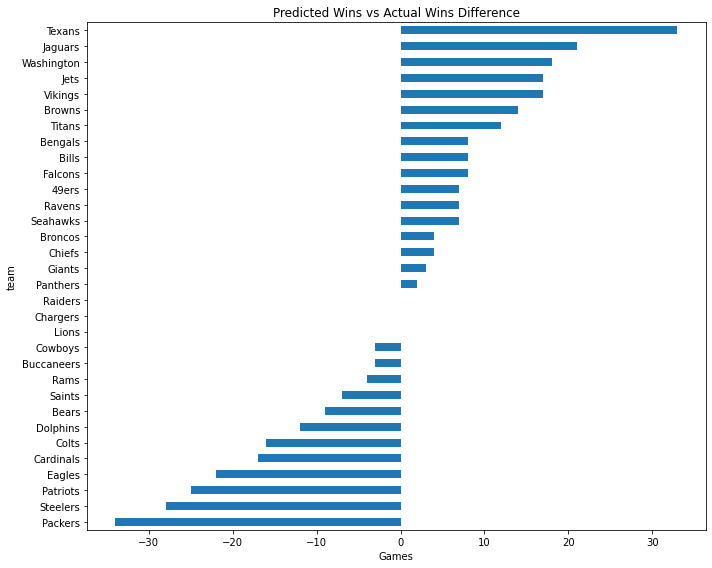

In [72]:
final_results.pred_win_loss_diff.sort_values(ascending=True).plot(kind='barh');
plt.title('Predicted Wins vs Actual Wins Difference');
plt.xlabel('Games');

Based on the optimal stats need to win the game based off of 20 years of data, The predicted outcomes and actual outcomes have some differences. 83% of the games outcomes were correct, The winner reached the optimal stat output while the loser fell short. 

1826 games or 17% of the data should of had diffrent outcomes based on the stat output from the game. 

In [73]:
final_results[final_results.predicted_win_amt > 0].sort_values(by='predicted_win_amt', ascending=False).head()

,actual_wins,actual_losses,actual_percentage,predicted_wins,predicted_losses,predicted_percentage,predicted_win_amt,predicted_loss_amt,pred_win_loss_diff
team,,,,,,,,,
Texans,143,188,0.760638,176,155,1.135484,49,16,33
Chiefs,188,152,1.236842,192,148,1.297297,43,39,4
Jaguars,121,206,0.587379,142,185,0.767568,37,16,21
Browns,109,214,0.509346,123,200,0.615000,36,22,14
Washington,130,195,0.666667,148,177,0.836158,36,18,18


In [74]:
final_results[final_results.predicted_loss_amt > 0].sort_values(by='predicted_loss_amt', ascending=False).head()

,actual_wins,actual_losses,actual_percentage,predicted_wins,predicted_losses,predicted_percentage,predicted_win_amt,predicted_loss_amt,pred_win_loss_diff
team,,,,,,,,,
Packers,215,131,1.641221,181,165,1.096970,15,49,-34
Patriots,265,95,2.789474,240,120,2.000000,23,48,-25
Steelers,217,125,1.736000,189,153,1.235294,14,42,-28
Eagles,192,149,1.288591,170,171,0.994152,19,41,-22
Colts,214,133,1.609023,198,149,1.328859,25,41,-16


In [75]:
final_results[final_results.pred_win_loss_diff > 0].sort_values(by='pred_win_loss_diff', ascending=False).head()

,actual_wins,actual_losses,actual_percentage,predicted_wins,predicted_losses,predicted_percentage,predicted_win_amt,predicted_loss_amt,pred_win_loss_diff
team,,,,,,,,,
Texans,143,188,0.760638,176,155,1.135484,49,16,33
Jaguars,121,206,0.587379,142,185,0.767568,37,16,21
Washington,130,195,0.666667,148,177,0.836158,36,18,18
Jets,141,191,0.738220,158,174,0.908046,32,15,17
Vikings,168,162,1.037037,185,145,1.275862,35,18,17


In [76]:
final_results[final_results.pred_win_loss_diff < 0].sort_values(by='pred_win_loss_diff', ascending=True).head()

,actual_wins,actual_losses,actual_percentage,predicted_wins,predicted_losses,predicted_percentage,predicted_win_amt,predicted_loss_amt,pred_win_loss_diff
team,,,,,,,,,
Packers,215,131,1.641221,181,165,1.096970,15,49,-34
Steelers,217,125,1.736000,189,153,1.235294,14,42,-28
Patriots,265,95,2.789474,240,120,2.000000,23,48,-25
Eagles,192,149,1.288591,170,171,0.994152,19,41,-22
Cardinals,151,178,0.848315,134,195,0.687179,19,36,-17


## Teams that Played Well but stiil Lost in over a 20 year period
- high enough stat output to win but still lost the game.
### Top 5 Teams by Game Amounts
- Texans: 49 games. 
- Chiefs: 43 games.
- Jaguars: 37 games.
- Browns: 36 games.
- Washington: 36 games.

## Teams that Played Bad but still Won in over a 20 year period
Easiest: below stat output threshold to win but still won the game. 
### Top 5 Teams by Game Amounts
- Packers: 49 games.
- Patriots: 48 games.
- Steelers: 42 games.
- Eagles: 41 games.
- Colts: 41 games.


# Most Difficult Road Traveled Analysis

In [77]:
#team actual and predicted outcome per game
game_compared = actual_predicted[['date', 'team', 'actual', 'predicted']]
game_compared 

,date,team,actual,predicted
0,2002,Giants,loss,loss
1,2002,Bills,loss,loss
2,2002,Bears,win,win
3,2002,Bengals,loss,loss
4,2002,Browns,loss,win
...,...,...,...,...
10685,2022,Rams,win,win
10686,2022,Bills,loss,win
10687,2022,Bengals,win,loss
10688,2022,49ers,loss,loss


In [78]:
#half of the dataset
match_finder = int(actual_predicted.shape[0]/ 2)

#find opponents for comparison
def find_opponent_top(df):
    
    
    
    df['opponent'] = ' '
    df['opponent_actual'] = ' '
    df['opponent_predicted'] = ' '
    
    for index, row in df.iterrows():
        row.opponent = game_compared.iloc[index + match_finder].team
        row.opponent_actual = game_compared.iloc[index + match_finder].actual
        row.opponent_predicted = game_compared.iloc[index + match_finder].predicted
        
    return df

top_games_matched = find_opponent_top(game_compared.iloc[: match_finder])
top_games_matched

def find_opponent_bottom(df):
    
    
    
    df['opponent'] = ' '
    df['opponent_actual'] = ' '
    df['opponent_predicted'] = ' '
    
    for index, row in df.iterrows():
        row.opponent = game_compared.iloc[index - match_finder].team
        row.opponent_actual = game_compared.iloc[index - match_finder].actual
        row.opponent_predicted = game_compared.iloc[index - match_finder].predicted
        
    return df

bottom_games_matched = find_opponent_bottom(game_compared.iloc[match_finder : ])
bottom_games_matched

games_matched = pd.concat([top_games_matched, bottom_games_matched])
games_matched
    

<ipython-input-78-6261cd8c3ba3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opponent'] = ' '
<ipython-input-78-6261cd8c3ba3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['opponent_actual'] = ' '
<ipython-input-78-6261cd8c3ba3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,date,team,actual,predicted,opponent,opponent_actual,opponent_predicted
0,2002,Giants,loss,loss,49ers,win,win
1,2002,Bills,loss,loss,Jets,win,win
2,2002,Bears,win,win,Vikings,loss,win
3,2002,Bengals,loss,loss,Chargers,win,win
4,2002,Browns,loss,win,Chiefs,win,win
...,...,...,...,...,...,...,...
10685,2022,Rams,win,win,Buccaneers,loss,loss
10686,2022,Bills,loss,win,Chiefs,win,win
10687,2022,Bengals,win,loss,Chiefs,loss,loss
10688,2022,49ers,loss,loss,Rams,win,win


## Game Type Descriptions

### Toughest Games
- Games that opponent were predicted to win regardless of actual outcome

### Easy Games
- Games that opponent were predicted to lose regardless of actual outcome

## Game Type Categories

### Hard Fought Loss
- team has optimal stats to win game but still lost because opponent also had optimal stats to win game.
- positive for toughest games

### Tough Loss
- team has optimal stats to win game but still lost while the opponent did not have optimal stats.
- negative for toughest games

### Loss Bad Game
- both teams have sub optimal stast and opponent wins
- negative for toughest games

### Expected Loss
- team has sub optimal stats to win the game and opponent has optimal stat, so opponent expected to win.
- positive for toughest games

### Hard Fought Win
- team has optimal stats to win game and actually win the game even when their opponent has optimal stats to win the game as well.
- positive for toughest games

### Lucky Win
- team has below optimal stats to win the game and still wins when their opponent did have optimal stats to win. 
- positive for toughest games

### Win Bad Game
- team has below optimal stats to win and still wins while their opponent also had sub optimal stats
- negative for toughest games

### Expected Win
- team has optimal stats to win the game and opponent has below optimal stats, so expected outcome
- negative for toughest games


In [79]:
#Types of games.


#team has optimal stats to win game but still lost because opponent also had optimal stats to win game.
hard_fought_loss = games_matched.query("actual == 'loss' and predicted == 'win' and opponent_actual == 'win' and opponent_predicted == 'win'")

#team has optimal stats to win game but still lost while the opponent did not have optimal stats but still won
tough_loss = games_matched.query("actual == 'loss' and predicted == 'win' and opponent_actual == 'win' and opponent_predicted == 'loss'")

#both teams have sub optimal stat but opponent still wins
loss_bad_game = games_matched.query("actual == 'loss' and predicted == 'loss' and opponent_actual == 'win' and opponent_predicted == 'loss'")

#team has sub optimal stats to win the game and opponent has optimal stat, so opponent expected to win.
expected_loss = games_matched.query("actual == 'loss' and predicted == 'loss' and opponent_actual == 'win' and opponent_predicted == 'win'")


#team has optimal stats to win game and actually win the game even when their opponent has optimal stats to win the game as well.
hard_fought_win = games_matched.query("actual == 'win' and predicted == 'win' and opponent_actual == 'loss' and opponent_predicted == 'win'")

#team has below optimal stats to win the game and still wins when their opponent did have optimal stats to win. 
lucky_win = games_matched.query("actual == 'win' and predicted == 'loss' and opponent_actual == 'loss' and opponent_predicted == 'win'")

#team has below optimal stats to win but still wins and their opponent also had sub optimal stats
win_bad_game = games_matched.query("actual == 'win' and predicted == 'loss' and opponent_actual == 'loss' and opponent_predicted == 'loss'")

#team has optimal stats to win the game and opponent has below optimal stats, so expected outcome
expected_win = games_matched.query("actual == 'win' and predicted == 'win' and opponent_actual == 'loss' and opponent_predicted == 'loss'")





In [80]:
print(hard_fought_loss.shape)
print(tough_loss.shape)
print(hard_fought_win.shape)
print(lucky_win.shape)
print(loss_bad_game.shape)
print(expected_loss.shape)
print(expected_win.shape)
print(win_bad_game.shape)
print(hard_fought_loss.shape[0]/games_matched.shape[0] * 100)
print(tough_loss.shape[0]/games_matched.shape[0]* 100)
print(hard_fought_win.shape[0]/games_matched.shape[0]* 100)
print(lucky_win.shape[0]/games_matched.shape[0]* 100)
print(loss_bad_game.shape[0]/games_matched.shape[0]* 100)
print(expected_loss.shape[0]/games_matched.shape[0]* 100)
print(expected_win.shape[0]/games_matched.shape[0]* 100)
print(win_bad_game.shape[0]/games_matched.shape[0]* 100)
print(hard_fought_loss.shape[0] + tough_loss.shape[0] +hard_fought_win.shape[0] +lucky_win.shape[0] +loss_bad_game.shape[0] +expected_loss.shape[0] +expected_win.shape[0] +win_bad_game.shape[0])

(648, 7)
(270, 7)
(648, 7)
(270, 7)
(638, 7)
(3789, 7)
(3789, 7)
(638, 7)
6.061739943872778
2.525724976613658
6.061739943872778
2.525724976613658
5.968194574368569
35.44434050514499
35.44434050514499
5.968194574368569
10690


In [81]:
#game type category list
game_list = [ 
'hard_fought_win',
'hard_fought_loss',
'lucky_win',
'tough_loss',
'win_bad_game',
'loss_bad_game',
'expected_win',
'expected_loss'
]

In [82]:
#team list
team_list = final_results.index.tolist()

In [83]:
#create dataframe with teams as the index
def game_type_table(game_list):
    
    df = pd.DataFrame(index=[team_list])
    
    for team in game_list:
        df[team] = ''
        
    return df

#fill game type category values
def game_type_data(df):
    
    for index, rows in df.iterrows():
        
        if index[0] not in hard_fought_win.team.value_counts().index.tolist():
            rows.hard_fought_win = 0
        else:
            rows.hard_fought_win = hard_fought_win.team.value_counts()[index[0]]
        
        if index[0] not in hard_fought_loss.team.value_counts().index.tolist():
            rows.hard_fought_loss = 0
        else:
            rows.hard_fought_loss = hard_fought_loss.team.value_counts()[index[0]]
        
        if index[0] not in lucky_win.team.value_counts().index.tolist():
            rows.lucky_win = 0
        else:
            rows.lucky_win = lucky_win.team.value_counts()[index[0]]
            
        if index[0] not in tough_loss.team.value_counts().index.tolist():
            rows.tough_loss = 0
        else:
            rows.tough_loss = tough_loss.team.value_counts()[index[0]]
            
        if index[0] not in win_bad_game.team.value_counts().index.tolist():
            rows.win_bad_game = 0
        else:
            rows.win_bad_game = win_bad_game.team.value_counts()[index[0]]
            
        if index[0] not in loss_bad_game.team.value_counts().index.tolist():
            rows.loss_bad_game = 0
        else:
            rows.loss_bad_game = loss_bad_game.team.value_counts()[index[0]]
            
        if index[0] not in expected_win.team.value_counts().index.tolist():
            rows.expected_win = 0
        else: 
            rows.expected_win = expected_win.team.value_counts()[index[0]]
            
        if index[0] not in expected_loss.team.value_counts().index.tolist():
            rows.expected_loss = 0
        else:
            rows.expected_loss = expected_loss.team.value_counts()[index[0]]
        
    return df

game_type = game_type_table(game_list)
game_data = game_type_data(game_type)
game_data

,hard_fought_win,hard_fought_loss,lucky_win,tough_loss,win_bad_game,loss_bad_game,expected_win,expected_loss
49ers,18,21,7,7,14,23,117,129
Bears,16,18,7,12,32,25,101,118
Bengals,25,23,3,4,16,22,108,127
Bills,19,18,5,11,16,17,113,129
Broncos,23,23,10,9,18,15,131,106
Browns,12,21,5,15,17,18,75,160
Buccaneers,16,20,6,7,24,24,105,129
Cardinals,13,10,9,9,27,20,102,139
Chargers,19,16,13,14,17,20,128,106
Chiefs,27,28,9,15,30,14,122,95


In [84]:
#reset index and create team column
game_data = game_data.reset_index()
game_data = game_data.rename(columns={'level_0': 'team'})
game_data

,team,hard_fought_win,hard_fought_loss,lucky_win,tough_loss,win_bad_game,loss_bad_game,expected_win,expected_loss
0,49ers,18,21,7,7,14,23,117,129
1,Bears,16,18,7,12,32,25,101,118
2,Bengals,25,23,3,4,16,22,108,127
3,Bills,19,18,5,11,16,17,113,129
4,Broncos,23,23,10,9,18,15,131,106
5,Browns,12,21,5,15,17,18,75,160
6,Buccaneers,16,20,6,7,24,24,105,129
7,Cardinals,13,10,9,9,27,20,102,139
8,Chargers,19,16,13,14,17,20,128,106
9,Chiefs,27,28,9,15,30,14,122,95


In [85]:
#find top 10 teams in each category
def top_10(df):
    
    for col in df:
        if col != 'team':
            print(col)
            print(df.sort_values(by=col, ascending=False)[:10][['team', col]])
            print('tie check')
            print(df.sort_values(by=col, ascending=False)[10:12][['team', col]])
            print('===========================')
top_10(game_data)

hard_fought_win
        team hard_fought_win
10     Colts              41
21  Patriots              34
11   Cowboys              29
9     Chiefs              27
29    Titans              26
13    Eagles              25
2    Bengals              25
25    Saints              24
26  Seahawks              24
24    Ravens              23
tie check
       team hard_fought_win
4   Broncos              23
19  Packers              23
hard_fought_loss
          team hard_fought_loss
28      Texans               42
16     Jaguars               30
9       Chiefs               28
31  Washington               28
26    Seahawks               26
14     Falcons               25
4      Broncos               23
30     Vikings               23
2      Bengals               23
15      Giants               23
tie check
      team hard_fought_loss
17    Jets               22
29  Titans               21
lucky_win
        team lucky_win
10     Colts        23
21  Patriots        22
22   Raiders        13
8   Ch

In [86]:
#merge final results and game category data to create final analysis dataframe
final_analysis = pd.merge(final_results.reset_index(), game_data, on='team', how='outer')
final_analysis

,team,actual_wins,actual_losses,actual_percentage,predicted_wins,predicted_losses,predicted_percentage,predicted_win_amt,predicted_loss_amt,pred_win_loss_diff,hard_fought_win,hard_fought_loss,lucky_win,tough_loss,win_bad_game,loss_bad_game,expected_win,expected_loss
0,49ers,156,180,0.866667,163,173,0.942197,28,21,7,18,21,7,7,14,23,117,129
1,Bears,156,173,0.901734,147,182,0.807692,30,39,-9,16,18,7,12,32,25,101,118
2,Bengals,152,176,0.863636,160,168,0.952381,27,19,8,25,23,3,4,16,22,108,127
3,Bills,153,175,0.874286,161,167,0.964072,29,21,8,19,18,5,11,16,17,113,129
4,Broncos,182,153,1.189542,186,149,1.248322,32,28,4,23,23,10,9,18,15,131,106
5,Browns,109,214,0.509346,123,200,0.615000,36,22,14,12,21,5,15,17,18,75,160
6,Buccaneers,151,180,0.838889,148,183,0.808743,27,30,-3,16,20,6,7,24,24,105,129
7,Cardinals,151,178,0.848315,134,195,0.687179,19,36,-17,13,10,9,9,27,20,102,139
8,Chargers,177,156,1.134615,177,156,1.134615,30,30,0,19,16,13,14,17,20,128,106
9,Chiefs,188,152,1.236842,192,148,1.297297,43,39,4,27,28,9,15,30,14,122,95


In [87]:
#find tough games, easy games, and win loss breakdown
pd.set_option('display.max_columns', None)
final_analysis['tough_games'] = final_analysis.expected_loss + final_analysis.hard_fought_loss + final_analysis.hard_fought_win + final_analysis.lucky_win
final_analysis['easy_games'] =  final_analysis.tough_loss + final_analysis.expected_win + final_analysis.win_bad_game + final_analysis.loss_bad_game
final_analysis['won_tough_game'] = final_analysis.hard_fought_win + final_analysis.lucky_win
final_analysis['loss_tough_game'] = final_analysis.hard_fought_loss + final_analysis.expected_loss
final_analysis['won_easy_game'] = final_analysis.expected_win + final_analysis.win_bad_game
final_analysis['loss_easy_game'] = final_analysis.tough_loss + final_analysis.loss_bad_game
final_analysis['cumulative'] = final_analysis.tough_games - final_analysis.easy_games
final_analysis

,team,actual_wins,actual_losses,actual_percentage,predicted_wins,predicted_losses,predicted_percentage,predicted_win_amt,predicted_loss_amt,pred_win_loss_diff,hard_fought_win,hard_fought_loss,lucky_win,tough_loss,win_bad_game,loss_bad_game,expected_win,expected_loss,tough_games,easy_games,won_tough_game,loss_tough_game,won_easy_game,loss_easy_game,cumulative
0,49ers,156,180,0.866667,163,173,0.942197,28,21,7,18,21,7,7,14,23,117,129,175,161,25,150,131,30,14
1,Bears,156,173,0.901734,147,182,0.807692,30,39,-9,16,18,7,12,32,25,101,118,159,170,23,136,133,37,-11
2,Bengals,152,176,0.863636,160,168,0.952381,27,19,8,25,23,3,4,16,22,108,127,178,150,28,150,124,26,28
3,Bills,153,175,0.874286,161,167,0.964072,29,21,8,19,18,5,11,16,17,113,129,171,157,24,147,129,28,14
4,Broncos,182,153,1.189542,186,149,1.248322,32,28,4,23,23,10,9,18,15,131,106,162,173,33,129,149,24,-11
5,Browns,109,214,0.509346,123,200,0.615000,36,22,14,12,21,5,15,17,18,75,160,198,125,17,181,92,33,73
6,Buccaneers,151,180,0.838889,148,183,0.808743,27,30,-3,16,20,6,7,24,24,105,129,171,160,22,149,129,31,11
7,Cardinals,151,178,0.848315,134,195,0.687179,19,36,-17,13,10,9,9,27,20,102,139,171,158,22,149,129,29,13
8,Chargers,177,156,1.134615,177,156,1.134615,30,30,0,19,16,13,14,17,20,128,106,154,179,32,122,145,34,-25
9,Chiefs,188,152,1.236842,192,148,1.297297,43,39,4,27,28,9,15,30,14,122,95,159,181,36,123,152,29,-22


Notes:

- hard fought loss + tough loss = predicted win amount
- lucky win + win bad game = predicted loss amount

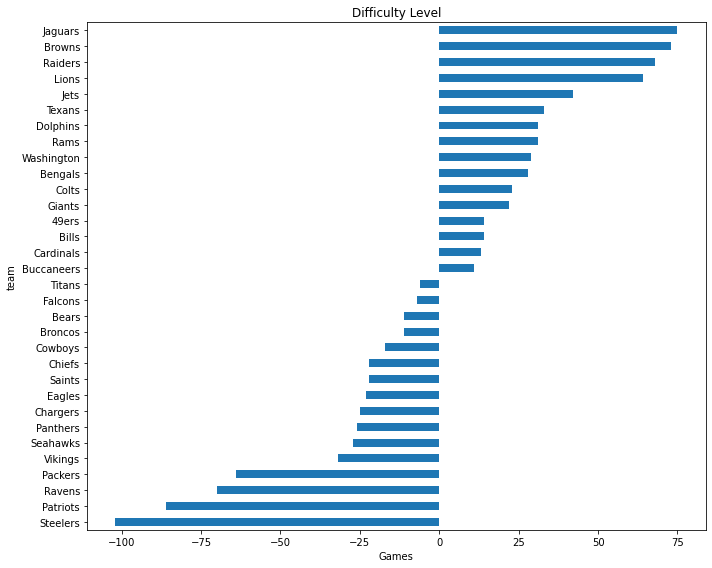

In [88]:
final_analysis.set_index('team').cumulative.sort_values(ascending=True).plot(kind='barh');
plt.title('Difficulty Level');
plt.xlabel('Games');

In [89]:
top_10(final_analysis)

actual_wins
        team  actual_wins
21  Patriots          265
27  Steelers          217
19   Packers          215
10     Colts          214
26  Seahawks          200
24    Ravens          198
25    Saints          196
13    Eagles          192
9     Chiefs          188
4    Broncos          182
tie check
        team  actual_wins
11   Cowboys          179
8   Chargers          177
actual_losses
          team  actual_losses
5       Browns            214
18       Lions            211
16     Jaguars            206
22     Raiders            203
31  Washington            195
17        Jets            191
28      Texans            188
23        Rams            183
0        49ers            180
6   Buccaneers            180
tie check
         team  actual_losses
7   Cardinals            178
15     Giants            177
actual_percentage
        team  actual_percentage
21  Patriots           2.789474
27  Steelers           1.736000
19   Packers           1.641221
10     Colts           1.60

# Conclusion Analysis
## Teams that Played the Most Difficult Games in the past 20 years. Outcome: Win or Lose
### Top 10 Teams
- Jaguars: 201 games.
- Browns: 198 games.
- Raiders: 197 games.
- Lions: 193 games.
- Jets: 187 games.
- Colts: 185 games.
- Texans: 182 games.
- Rams: 182 games.
- Bengals: 178 games.
- Giants: 178 games.

## Teams that Played the Most Difficult Games in the past 20 years. Outcome: Win
### Top 10 Teams
- Colts: 64 games.
- Patriots: 56 games.
- Cowboys: 38 games.
- Chiefs: 36 games.
- Eagles: 34 games.
- Saints: 34 games.
- Packers: 33 games.
- Seahawks: 33 games.
- Broncos: 33 games.
- Chargers: 32 games.


## Teams that Played the Most Difficult Games in the past 20 years. Outcome: Loss
### Top 10 Teams
- Browns: 181 games.
- Jaguars: 180 games.
- Raiders: 172 games.
- Lions: 169 games.
- Texans: 164 games. 
- Washington: 164 games. 
- Jets: 163 games.
- Rams: 157 games.
- 49ers: 150 games. 
- Tied
- Giants: 150 games.
- Bengals: 150 games. 
- Dolphins: 150 games. 


## Teams that Played the Easiest Games in the past 20 years. Outcome: Win or Lose
### Top 10 Teams
- Patriots: 223 games.
- Steelers: 222 games.
- Ravens: 206 games.
- Packers: 205 games.
- Seahawks: 187 games.
- Eagles: 182 games.
- Vikings: 181 games.
- Chiefs: 181 games.
- Panthers: 180 games.
- Saints: 180 games.




## Teams that Played the Easiest Games in the past 20 years. Outcome: Win
### Top 10 Teams
- Patriots: 209 games.
- Steelers: 191 games.
- Packers: 182 games.
- Seahawks: 167 games.
- Ravens: 167 games.
- Saints: 162 games.
- Eagles: 158 games.
- Chiefs: 152 games.
- Colts: 150 games.
- Broncos: 149 games.



## Teams that Played the Easiest Games in the past 20 years. Outcome: Loss
### Top 10 Teams
- Lions: 42 games.
- Ravens: 39 games.
- Vikings: 38 games.
- Bears: 37 games.
- Chargers: 34 games. 
- Browns: 33 games. 
- Panthers: 33 games.
- Cowboys: 33 games.
- Titans: 32 games. 
- Tied
- Washington: 31 games.
- Steelers: 31 games. 
- Buccaneers: 31 games. 



## Analysis
### Toughest Road
#### Jaguars
Over the span of 20 years, the data shows that the Jaguars played in the toughest games overall. They played in 201 games where their opponent had optimal stats to win the game and only came away with 21 victories. Their predicted record shows they should of won 21 more games then they actually did, 7 of those games the opponent had sub optimal stats. The Jaguars were on the losing end of bad games by both teams 19 out of 27 games. Overall opponent difficulty is 75 which is the highest of any team.

### Toughest Road Strongest Team
#### Colts
Analysis reveals the the Colts had a very tough road in the past 20 years, with 185 tough games. Colts are the strongest team because they won 64 of those games, which is the most of any team. 41 games being hard fought wins, while 23 were lucky wins. Although their predicted record shows that they were a dominate team over the years, it also revealed they should of lost 16 more games then they actual did. Their overall opponent difficulty is a 23 which is the 6th highest

### Toughest Road Weakest Team
#### Browns
The Browns according to the data had 198 tough games overall and were able to secure on 17 wins out of all those games. The Browns poor outcomes against strong teams earns the the weakest team title. Their actual record of 109/214 is 14 games off their predicted record, revealing they could snatch a victory while it was avaliable. Their overall opponent difficulty is a 73, which is the second highest in 20 years. 

### Easiest Road
#### Steelers
The Steelers had the easiest road overall with 222 games and only 120 tough games. Data shows they won 191 of their easy games and only losing 31. Their predicted record of 189/153 is 28 less wins then their actual record of 217/125. The Steelers expected wins are 1.78 times higher than their expected loss. Their overall opponent difficulty is -102 which is the highest amoungst any team and 16 points higher then the second place team. 

### Easiest Road Strongest Team
#### Patriots
The data shows the Patriots as the team with the most wins on the easiest road in the past 20 years. Recorded with the highest amount of easy games with a total of 223 and winning 209 of them. The Patriots astounding record of 265/95 is just 15 more victories higher then their predicted record. Although they had an easy road they did win 34 of 51 hard fought games, won 22 games they should of lost as lucky wins, and won 26 bad games. Their overall opponent difficulty is a -86 which is the second lowest in the league 

### Easiest Road Weakest Team
#### Ravens
The team with the most losses on an easy road is the Ravens. Analysis shows their 39 losses in easy games is the second highest but the most amongst teams with a negative opponent difficulty. Their actual record of 198/144 is 7 victories below their predicted record, meaning they could of won more games. The Ravens suffered 13 tough losses and lost more in bad games then wins with a 14/26 bad game record. Their overall opponent difficulty is a -70 whis is rank third lowest in the league. 

In [101]:
def team_report(df, input):
    
    report = df[df.team == input]
    
    print('Team Name: ' + report.team.values[0])
    print('Actual Win/Loss: ' + str(report.actual_wins.values[0]) + '/' + str(report.actual_losses.values[0]))
    print('Predicted Win/Loss: ' + str(report.predicted_wins.values[0]) + '/' + str(report.predicted_losses.values[0]))
    print('Expected Win/Loss: ' + str(report.expected_win.values[0]) + '/' + str(report.expected_loss.values[0]))
    print('Hard Fought Win/Loss: ' + str(report.hard_fought_win.values[0]) + '/' + str(report.hard_fought_loss.values[0]))
    print('Lucky Win/Tough Loss: ' + str(report.lucky_win.values[0]) + '/' + str(report.tough_loss.values[0]))
    print('Bad Game Win/Loss: ' + str(report.win_bad_game.values[0]) + '/' + str(report.loss_bad_game.values[0]))
    print('Tough Games: ' + str(report.tough_games.values[0]) + ' Tough Games Win/Loss: ' + str(report.won_tough_game.values[0]) + '/' + str(report.loss_tough_game.values[0]) )
    print('Easy Games: ' + str(report.easy_games.values[0]) + ' Easy Games Win/Loss: ' + str(report.won_easy_game.values[0]) + '/' + str(report.loss_easy_game.values[0]) )
    print('Overall Difficulty: ' + str(report.cumulative.values[0]))

team_report(final_analysis, input())

Ravens
Team Name: Ravens
Actual Win/Loss: 198/144
Predicted Win/Loss: 205/137
Expected Win/Loss: 153/89
Hard Fought Win/Loss: 23/16
Lucky Win/Tough Loss: 8/13
Bad Game Win/Loss: 14/26
Tough Games: 136 Tough Games Win/Loss: 31/105
Easy Games: 206 Easy Games Win/Loss: 167/39
Overall Difficulty: -70
